<div align="center">
  <img src="logoinpe.png">
</div>


# Análise Estatística e Espectral de Processos Estocásticos (CAP-239-4)

<hr>

Docentes:
- Dr. Reinaldo Rosa
- Dr. Leonardo B. L. Santos

Discentes:
 - Fernando Cossetin;
 - Felipe Menino Carlos;
 - Felipe Perin.

**Atividade**: Análise e visualização inicial dos dados

**Descrição da atividade**: Utilizar técnicas de `Cullen-Frey`, `Histogramas` e `PDFs`: A partir do dataset do seu Team visualize, obtenha os respectivos Histogramas e PDFs para as seguintes variáveis: Número Total de Casos, Número Total de Mortes, Número Total De Testes, `Número Diário de Casos (NDC)`, `Número Diário de Mortes (NDM)`, `Número Diário de Testes (NDT)`. Identifique semelhanças e discrepâncias entre os países. Este exercício é apenas para os dados da OWD. Implemente ainda uma análise de regressão linear em Python entre as variáveis: NDC e NDT para os países que apresentam PDF próximas.

<hr>

In [1]:
import scipy.stats
import numpy as np
import pandas as pd
from plotnine import *
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.style.use('ggplot')

In [2]:
data_owd = pd.read_csv('../1_conjunto_de_dados/dataset/data/blueteam_international_update_2020_06_03.csv')
data_owd['date'] = pd.to_datetime(data_owd['date'])

### Visualização geral dos dados

Antes de iniciar a aplicação das técnicas sobre os conjuntos de dados, faz-se necessário a visualização destes, entendendo o comportamento de tais dados para cada país. Os tópicos abaixo apresentam esta visualização inicial.

* Número total de casos

In [3]:
countries = data_owd.groupby('iso_code')

In [4]:
NAMES = {
    'BRA': 'Brasil',
    'CAN': 'Canadá',
    'CUB': 'Cuba',
    'MEX': 'México',
    'RUS': 'Rússia'
}

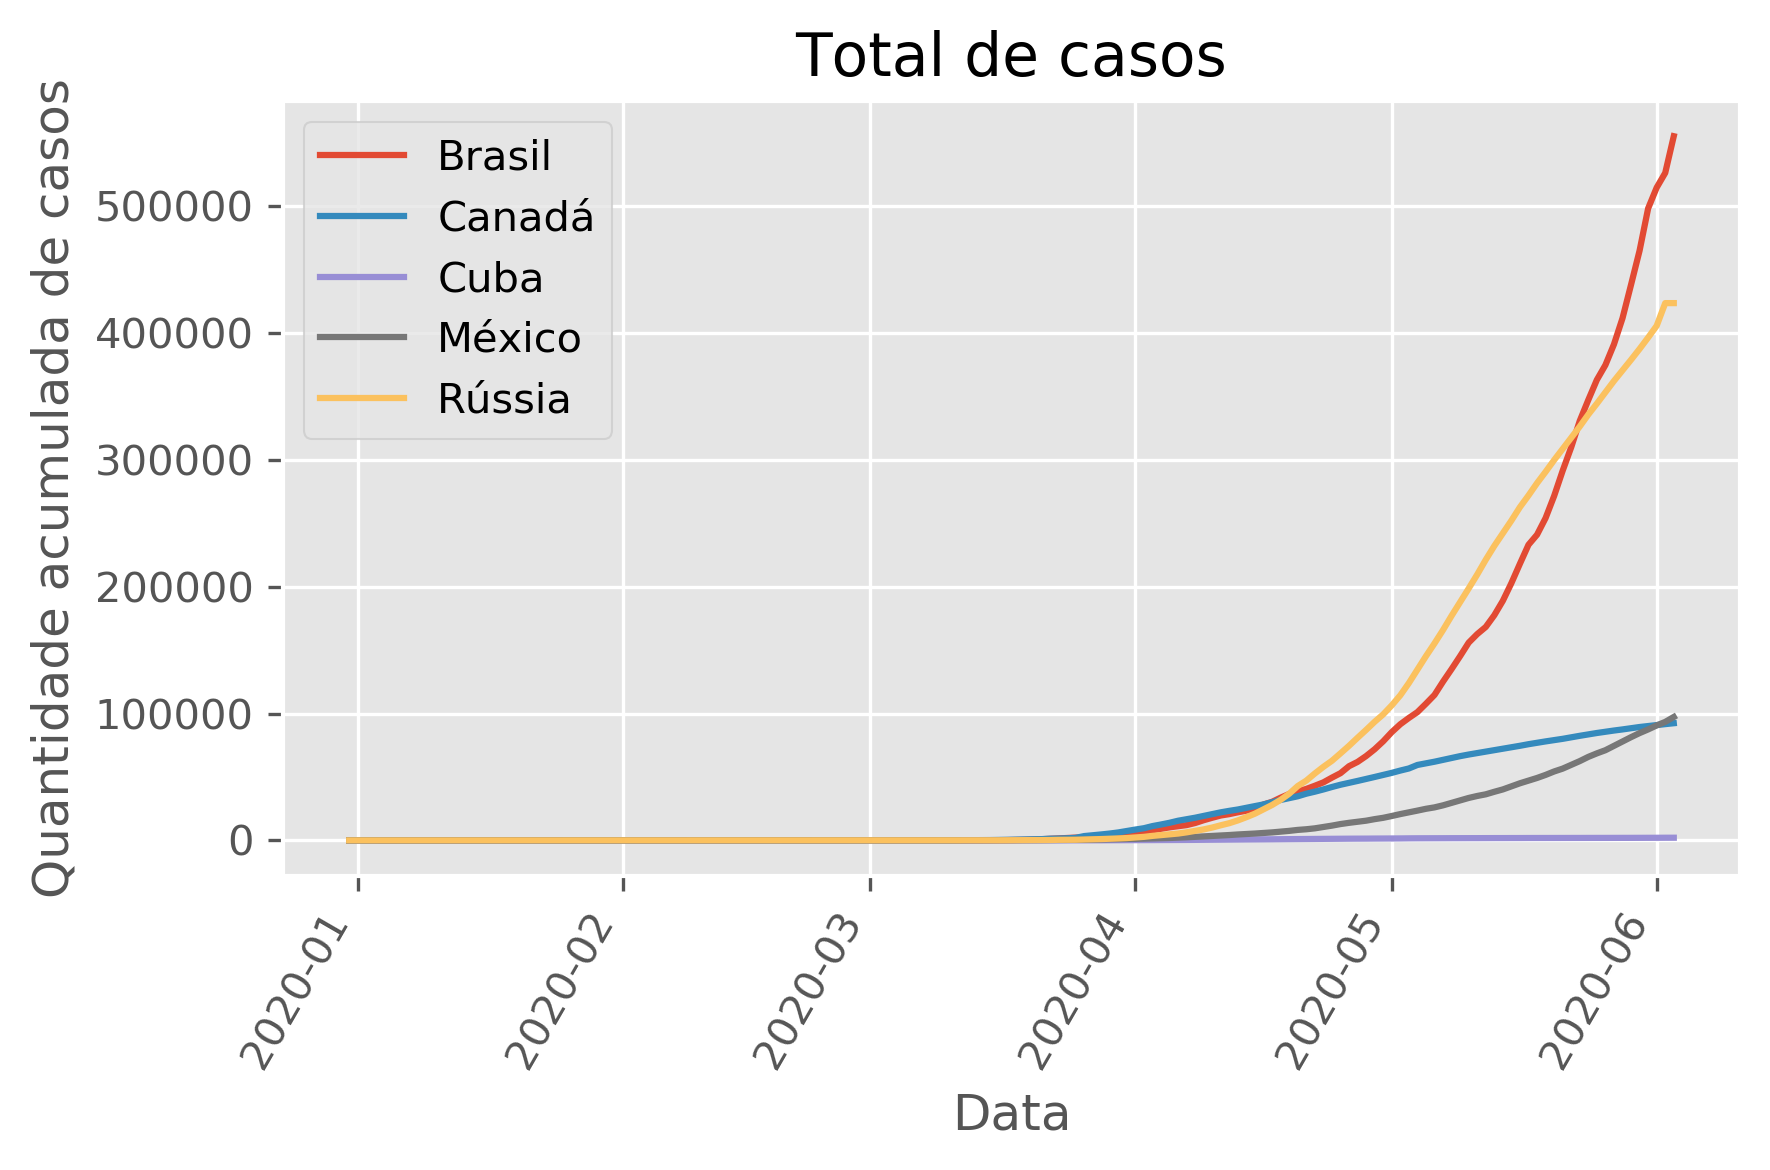

In [5]:
fig, ax = plt.subplots(dpi = 300)
legend = []

plt.setp(plt.gca().get_xticklabels(), rotation=60, ha="right")
for country in countries.groups:
    legend.append(NAMES[country])
    country_data = countries.get_group(country)
    
    plt.plot(country_data.date, country_data.total_cases)
    
ax.set_xlabel('Data')
ax.set_ylabel('Quantidade acumulada de casos')
plt.title('Total de casos')
plt.tight_layout()
plt.legend(legend)
plt.show()

* Número total de mortes

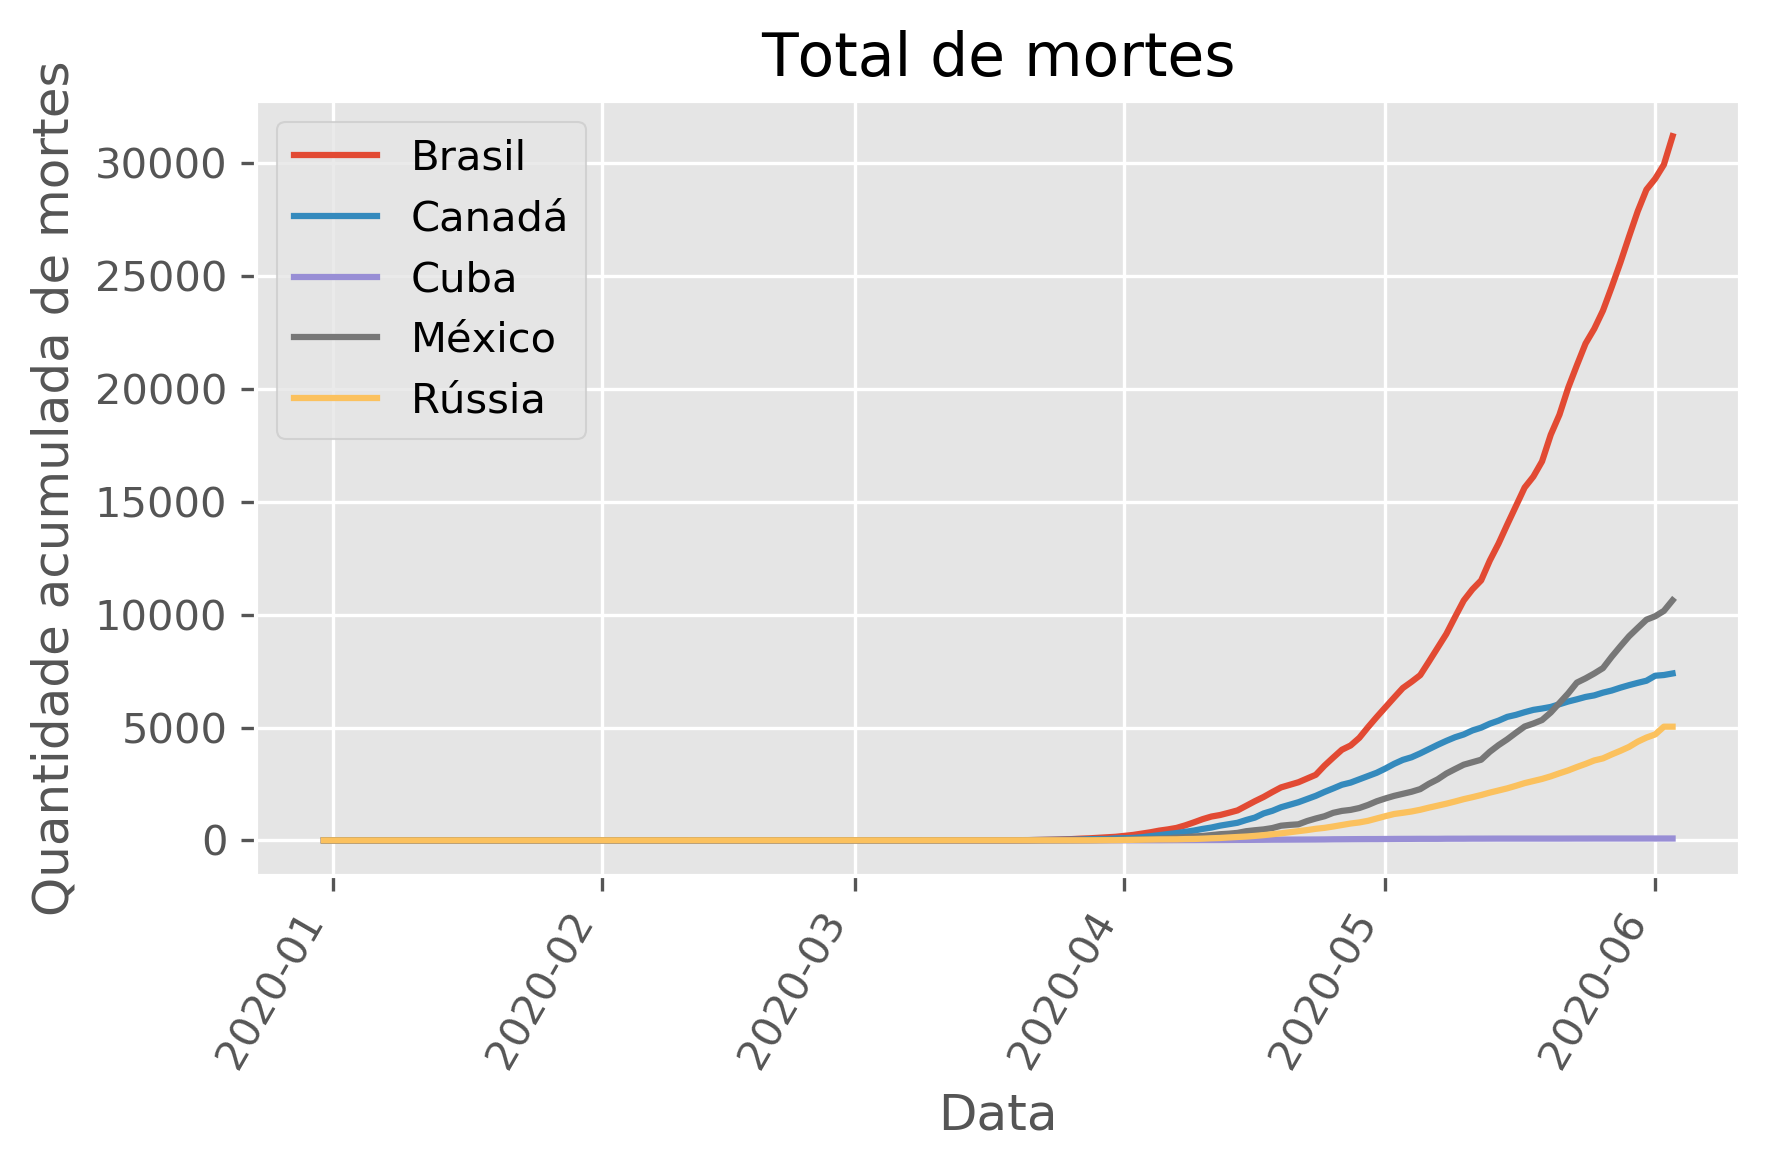

In [6]:
fig, ax = plt.subplots(dpi = 300)
legend = []

plt.setp(plt.gca().get_xticklabels(), rotation=60, ha="right")
for country in countries.groups:
    legend.append(NAMES[country])
    country_data = countries.get_group(country)
    
    plt.plot(country_data.date, country_data.total_deaths)
    
ax.set_xlabel('Data')
ax.set_ylabel('Quantidade acumulada de mortes')
plt.title('Total de mortes')
plt.tight_layout()
plt.legend(legend)
plt.show()

* Número total de testes (Em análise com o professor)

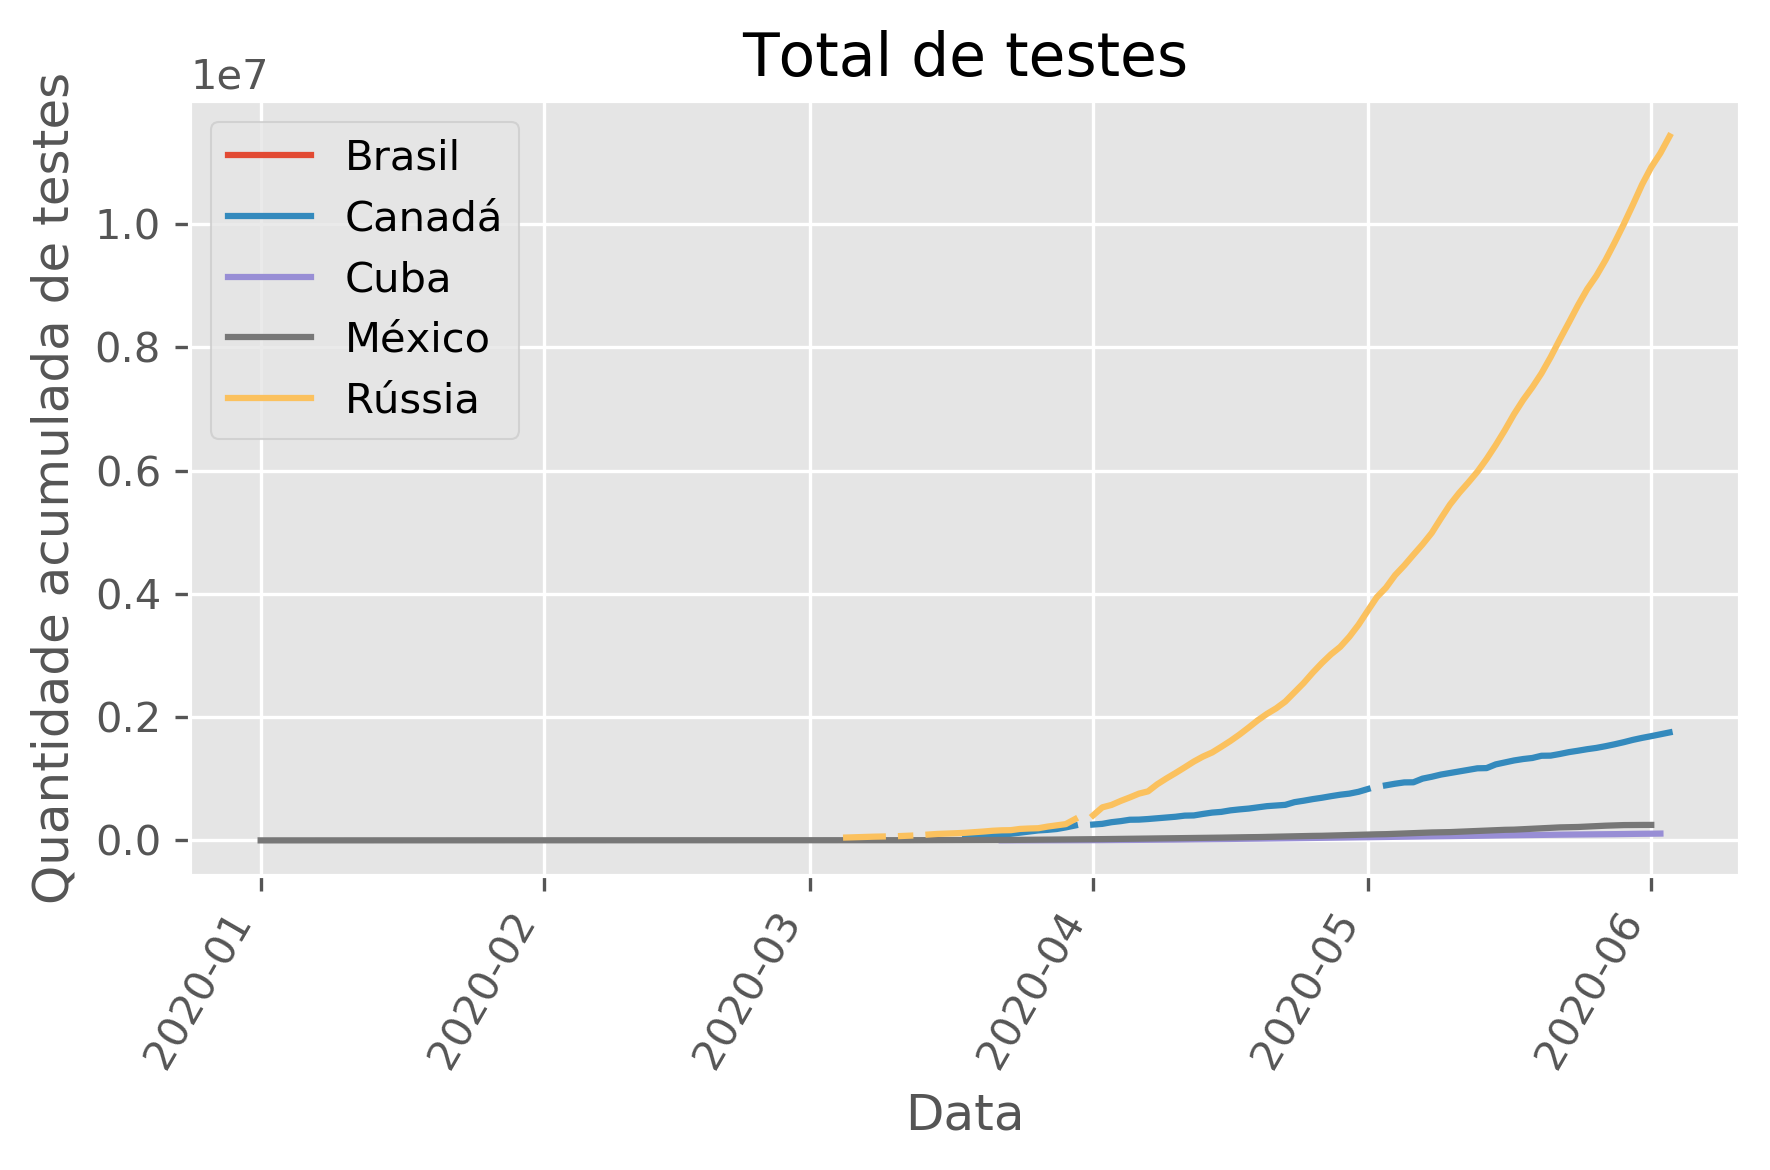

In [7]:
fig, ax = plt.subplots(dpi = 300)
legend = []

plt.setp(plt.gca().get_xticklabels(), rotation=60, ha="right")
for country in countries.groups:
    legend.append(NAMES[country])
    country_data = countries.get_group(country)
    
    plt.plot(country_data.date, country_data.total_tests)
    
ax.set_xlabel('Data')
ax.set_ylabel('Quantidade acumulada de testes')
plt.title('Total de testes')
plt.tight_layout()
plt.legend(legend)
plt.show()

<hr>

* Número diário de casos (NDC)


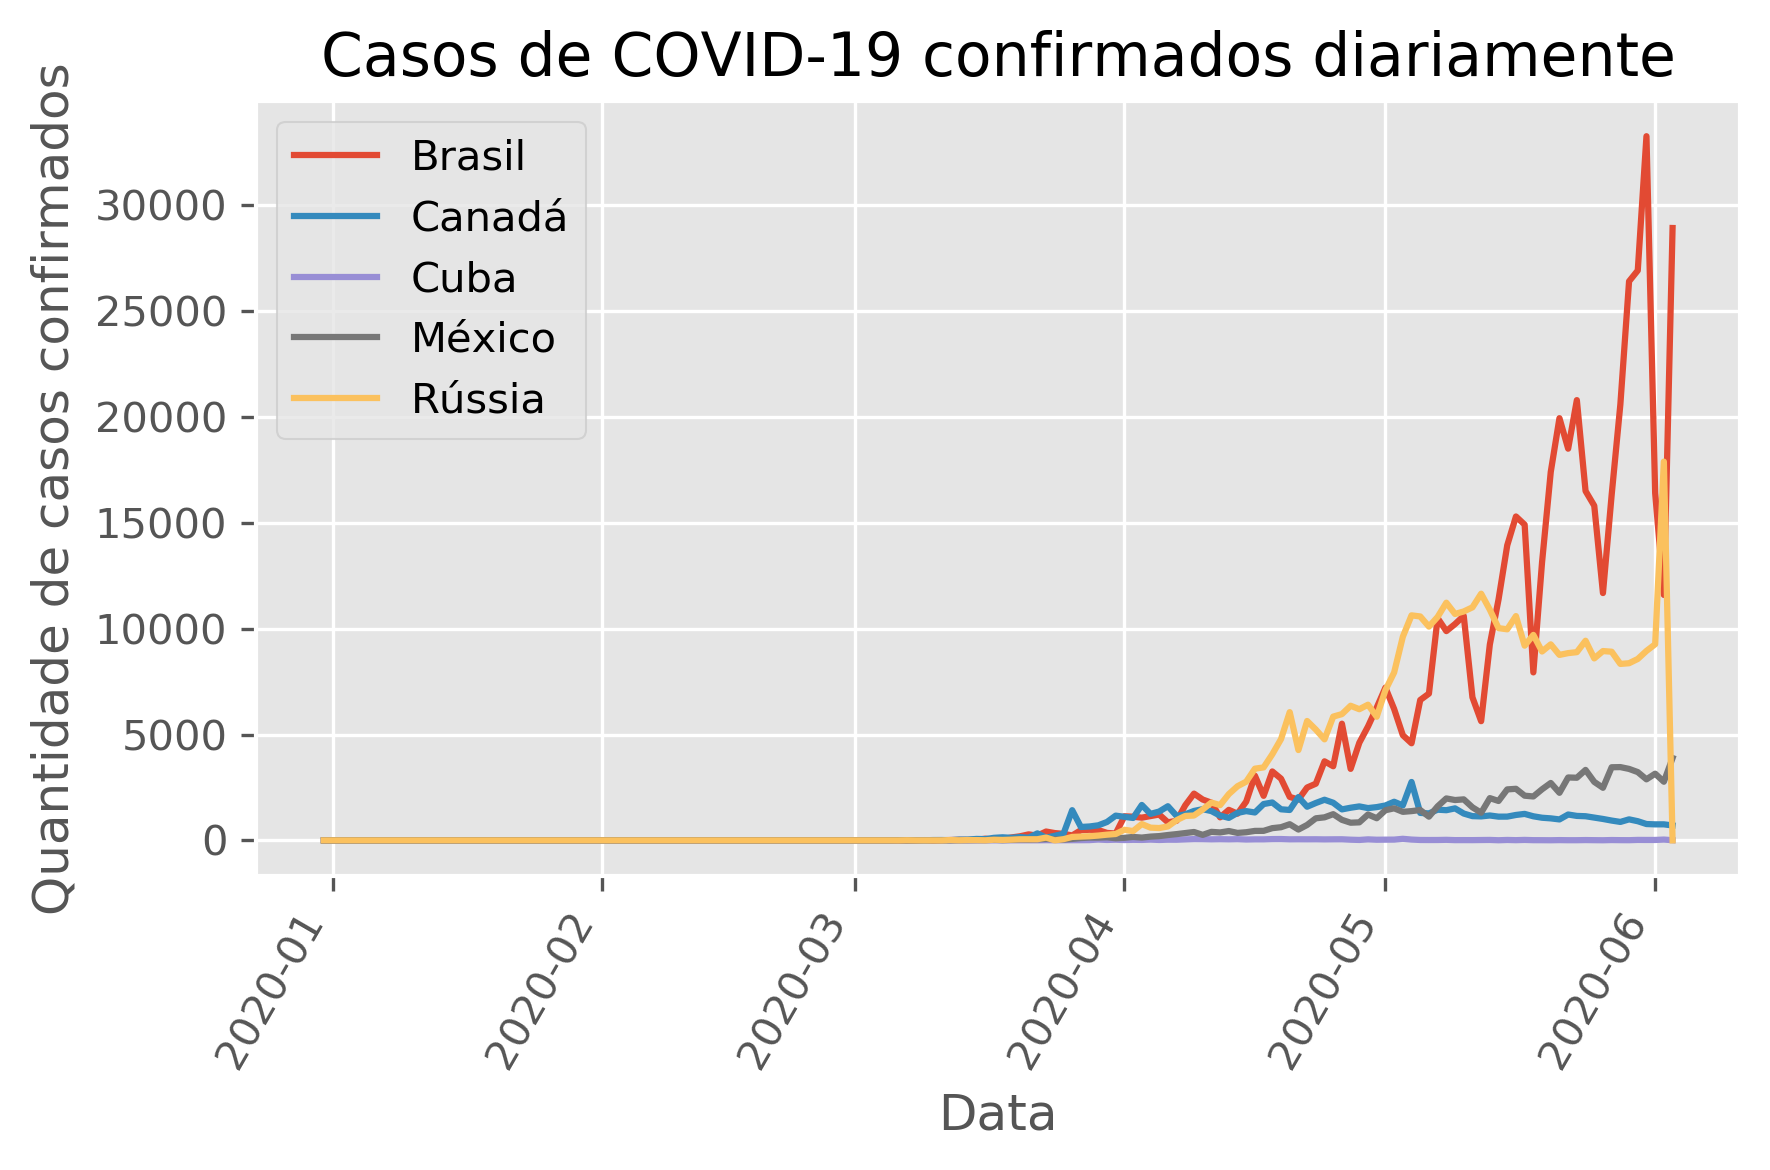

In [8]:
fig, ax = plt.subplots(dpi = 300)
legend = []

plt.setp(plt.gca().get_xticklabels(), rotation=60, ha="right")
for country in countries.groups:
    legend.append(NAMES[country])
    country_data = countries.get_group(country)
    
    plt.plot(country_data.date, country_data.new_cases)
    
ax.set_xlabel('Data')
ax.set_ylabel('Quantidade de casos confirmados')
plt.title('Casos de COVID-19 confirmados diariamente')
plt.tight_layout()
plt.legend(legend)
plt.show()

* Número diário de mortes (NDM)

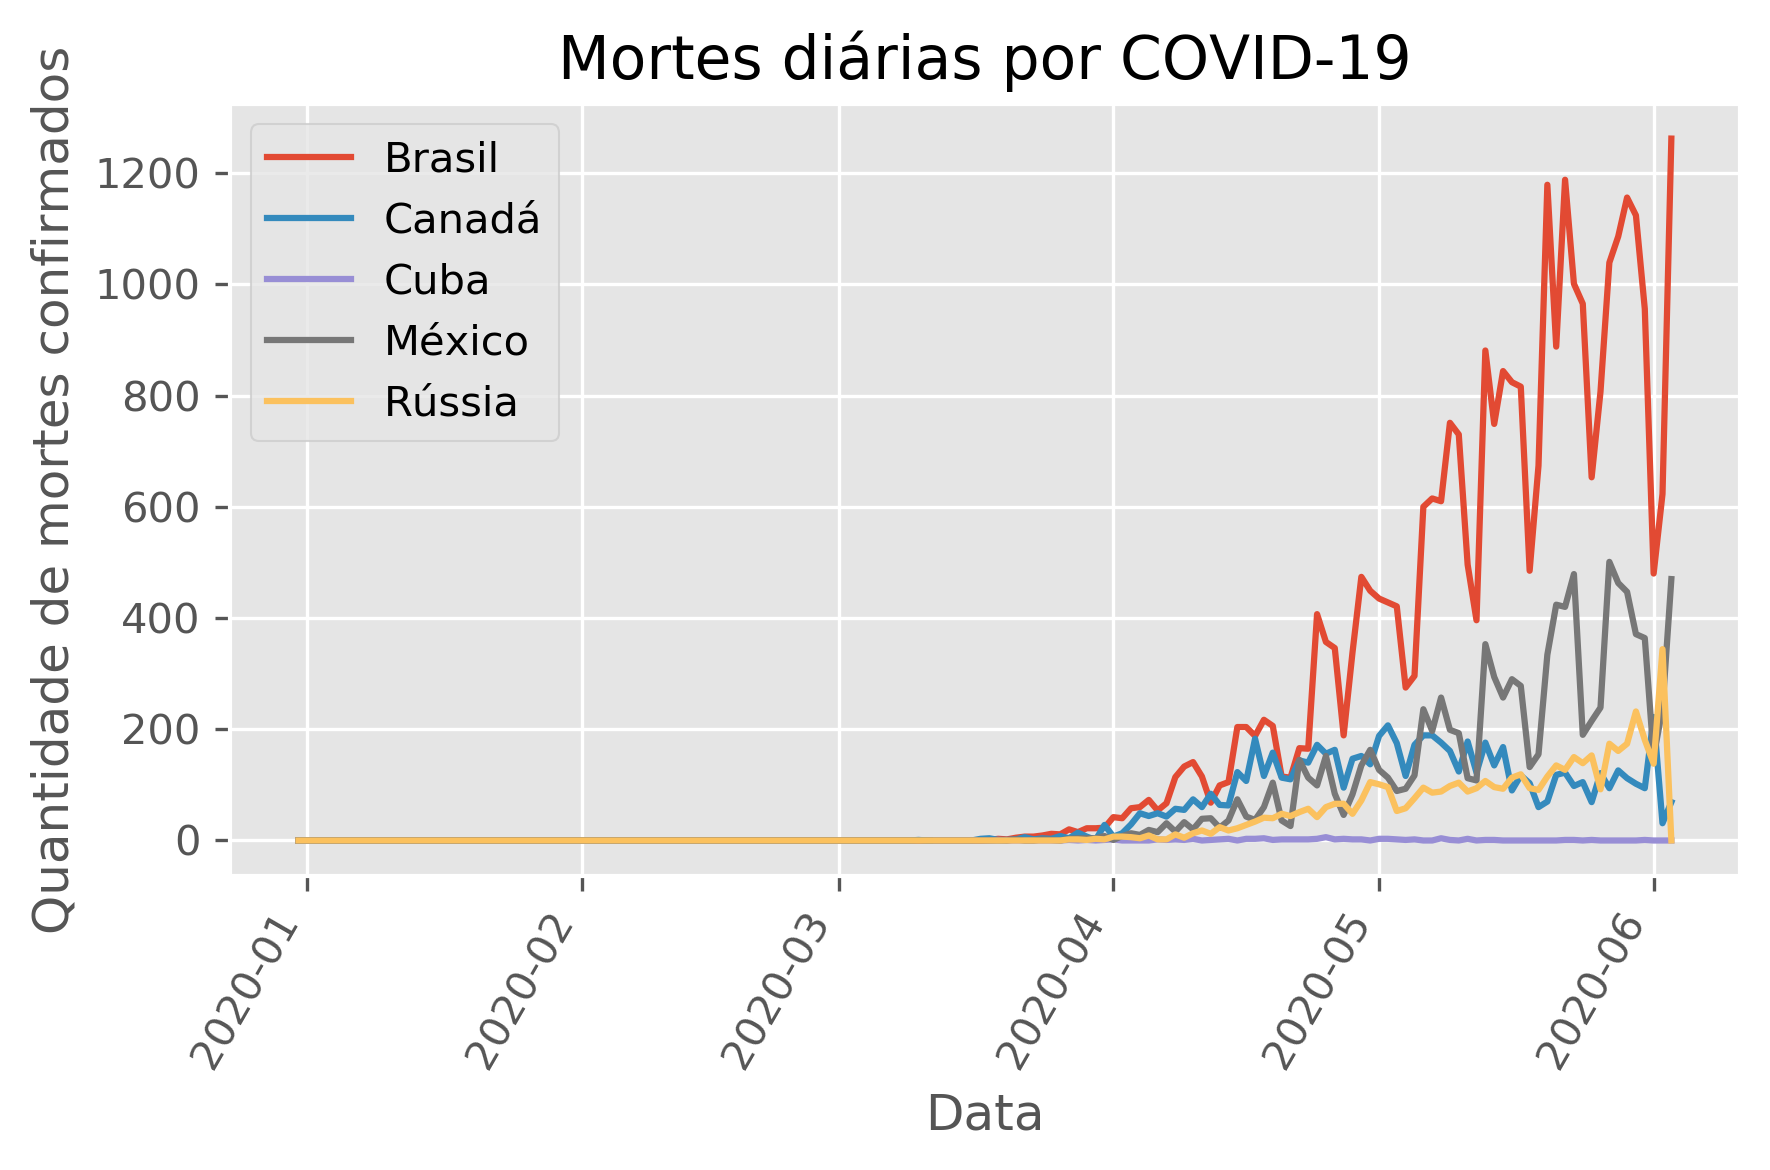

In [9]:
fig, ax = plt.subplots(dpi = 300)
legend = []

plt.setp(plt.gca().get_xticklabels(), rotation=60, ha="right")
for country in countries.groups:
    legend.append(NAMES[country])
    country_data = countries.get_group(country)
    
    plt.plot(country_data.date, country_data.new_deaths)
    
ax.set_xlabel('Data')
ax.set_ylabel('Quantidade de mortes confirmados')
plt.title('Mortes diárias por COVID-19')
plt.tight_layout()
plt.legend(legend)
plt.show()

* Número diário de testes

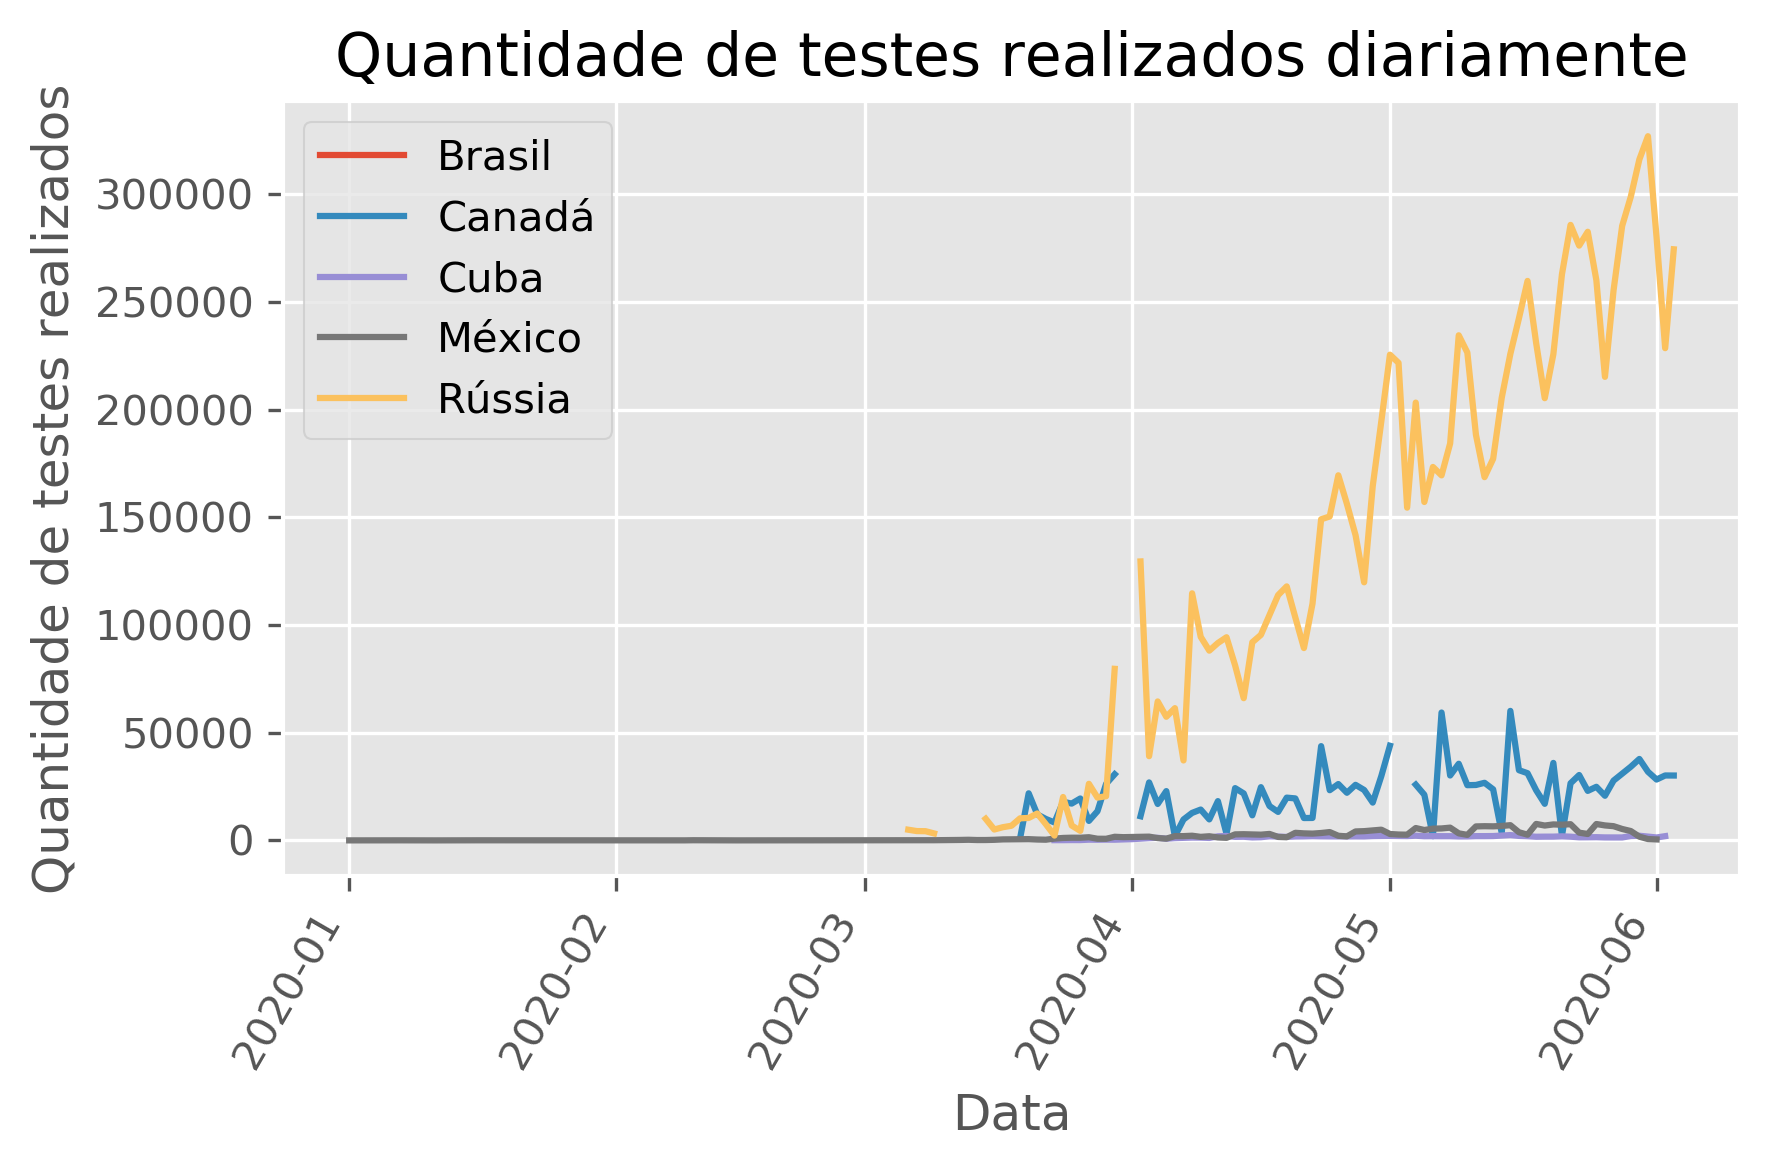

In [10]:
fig, ax = plt.subplots(dpi = 300)
legend = []

plt.setp(plt.gca().get_xticklabels(), rotation=60, ha="right")
for country in countries.groups:
    legend.append(NAMES[country])
    country_data = countries.get_group(country)
    
    plt.plot(country_data.date, country_data.new_tests)
    
ax.set_xlabel('Data')
ax.set_ylabel('Quantidade de testes realizados')
plt.title('Quantidade de testes realizados diariamente')
plt.tight_layout()
plt.legend(legend)
plt.show()

<hr>

### Histogramas

In [11]:
labelerfnc = lambda x: NAMES[x] # Criado para facilitar a exibição dos nomes


def standardize_bycountry(data, variable):
    """Função para agrupar por país e normalizar os dados
    """
    
    def standardize_factor(distribution):
        return (distribution - np.mean(distribution)) / np.std(distribution)
    def normalize_minmax(data):
        return (data - data.min()) / (data.max() - data.min())
    
    res = []
    groups = data.groupby('iso_code')
    for group in groups:
        group_data = groups.get_group(group[0])
        
        res.append(
            pd.DataFrame({
                variable: normalize_minmax(group_data[variable])
            })
        )
        res[-1]['iso_code'] = group[0]
    return pd.concat(res)

    
def plot_histogram_bycountry(data, variable_to_plot, title, xlabel, ylabel):
    """Função para gerar os histogramas normalizados, por país.
    """
    data_owd = standardize_bycountry(data, variable_to_plot)
    
    return (
        ggplot(data_owd, aes(variable_to_plot))
            + geom_histogram(bins = 19)
            + ggtitle(title)
            + xlab(xlabel) + ylab(ylabel)
            + facet_wrap('~iso_code', labeller = labelerfnc)
            + theme(axis_text_x = element_text(angle = 45, hjust = 1), dpi = 300)
    )

In [12]:
# tmp: Filtrando para remover alguns zeros (Necessário ? Ao fazer há uma melhora na interpretação dos resultados)
data_owd = data_owd[data_owd['date'] >= '2020-03-22']

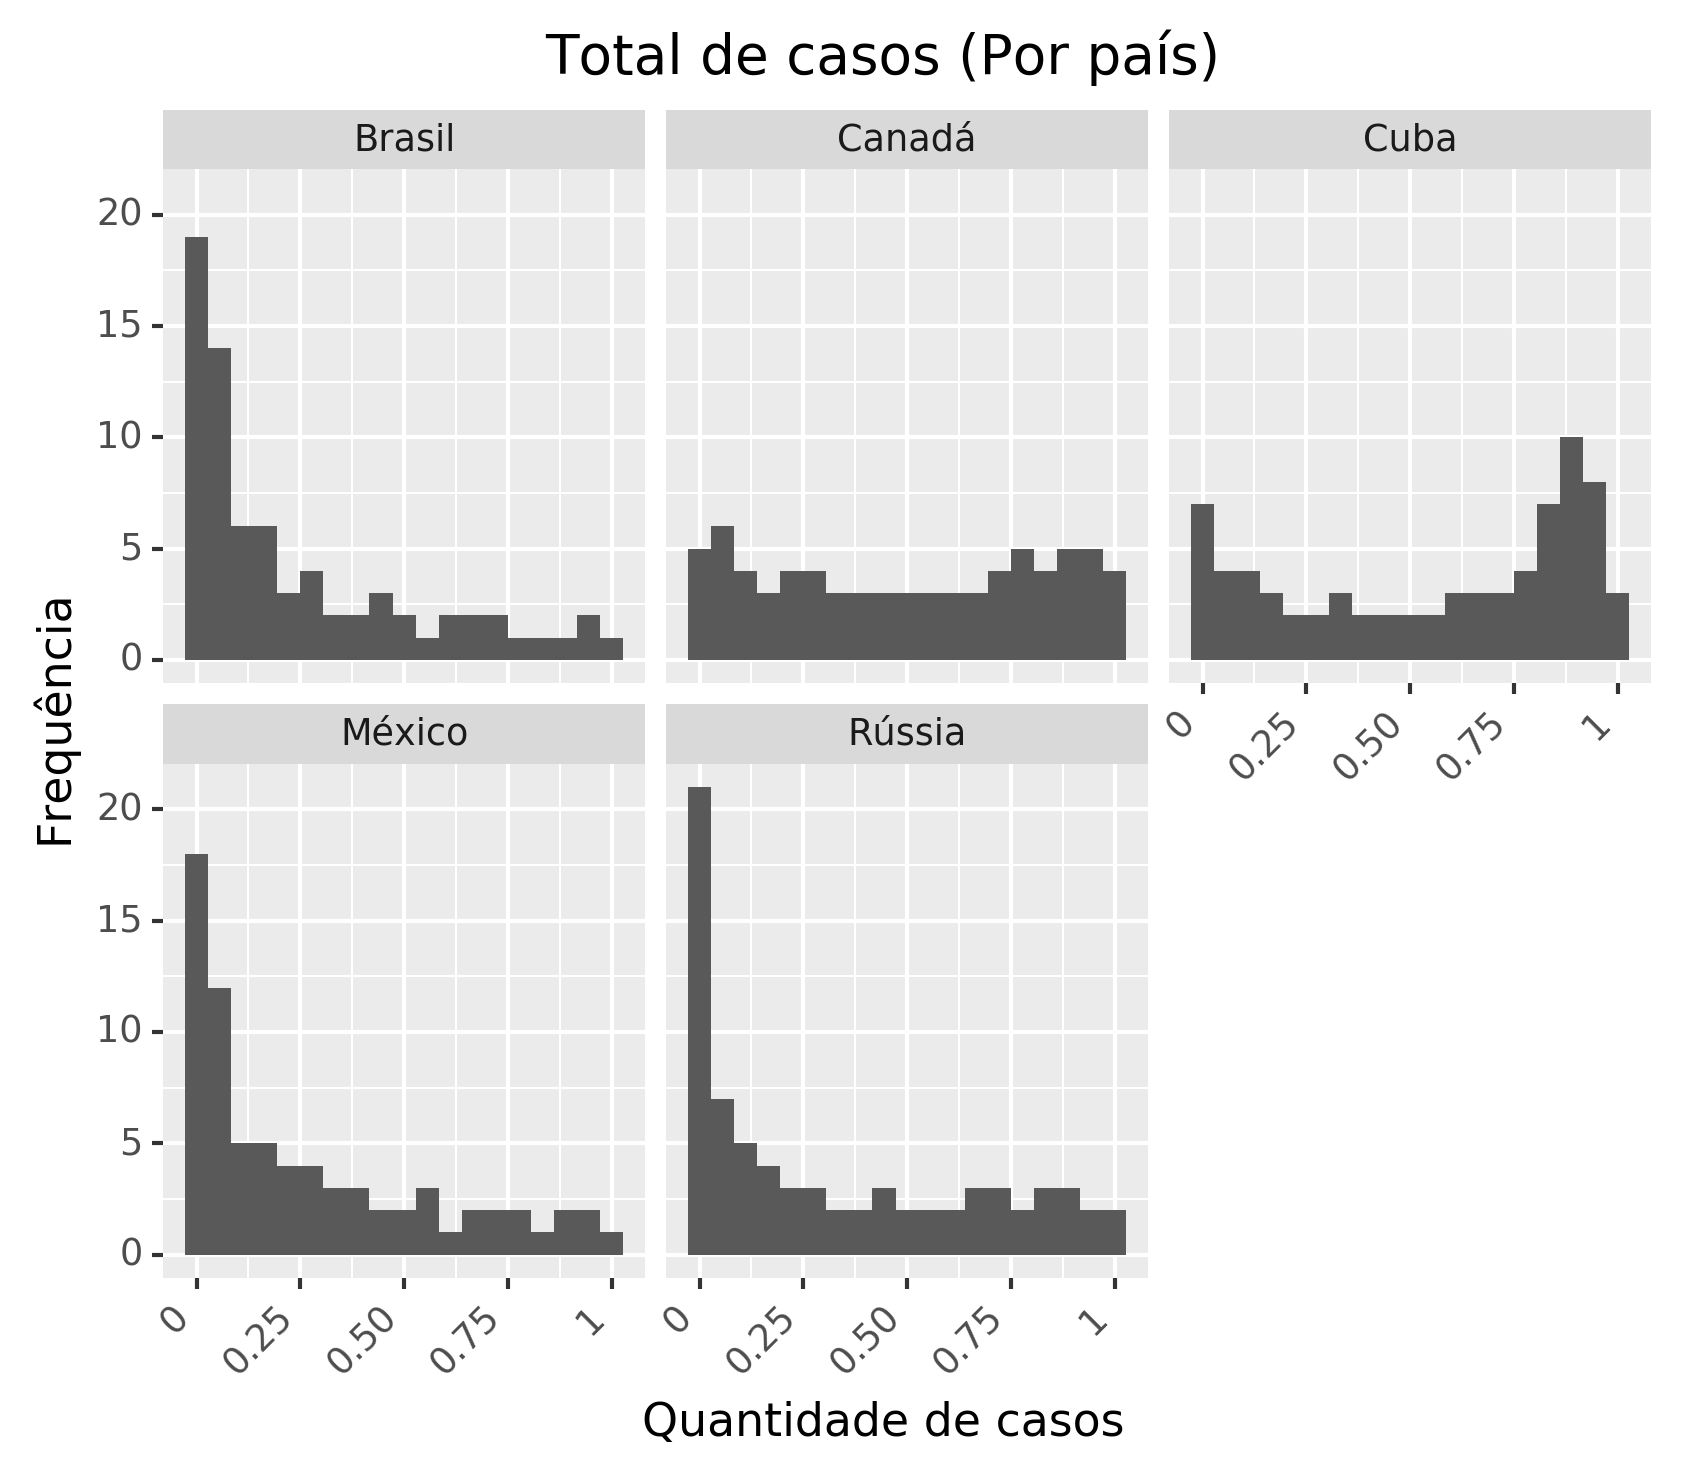

<ggplot: (-9223363251972718918)>

In [13]:
plot_histogram_bycountry(data_owd, 'total_cases', 'Total de casos (Por país)', 
                                                             'Quantidade de casos', 'Frequência')

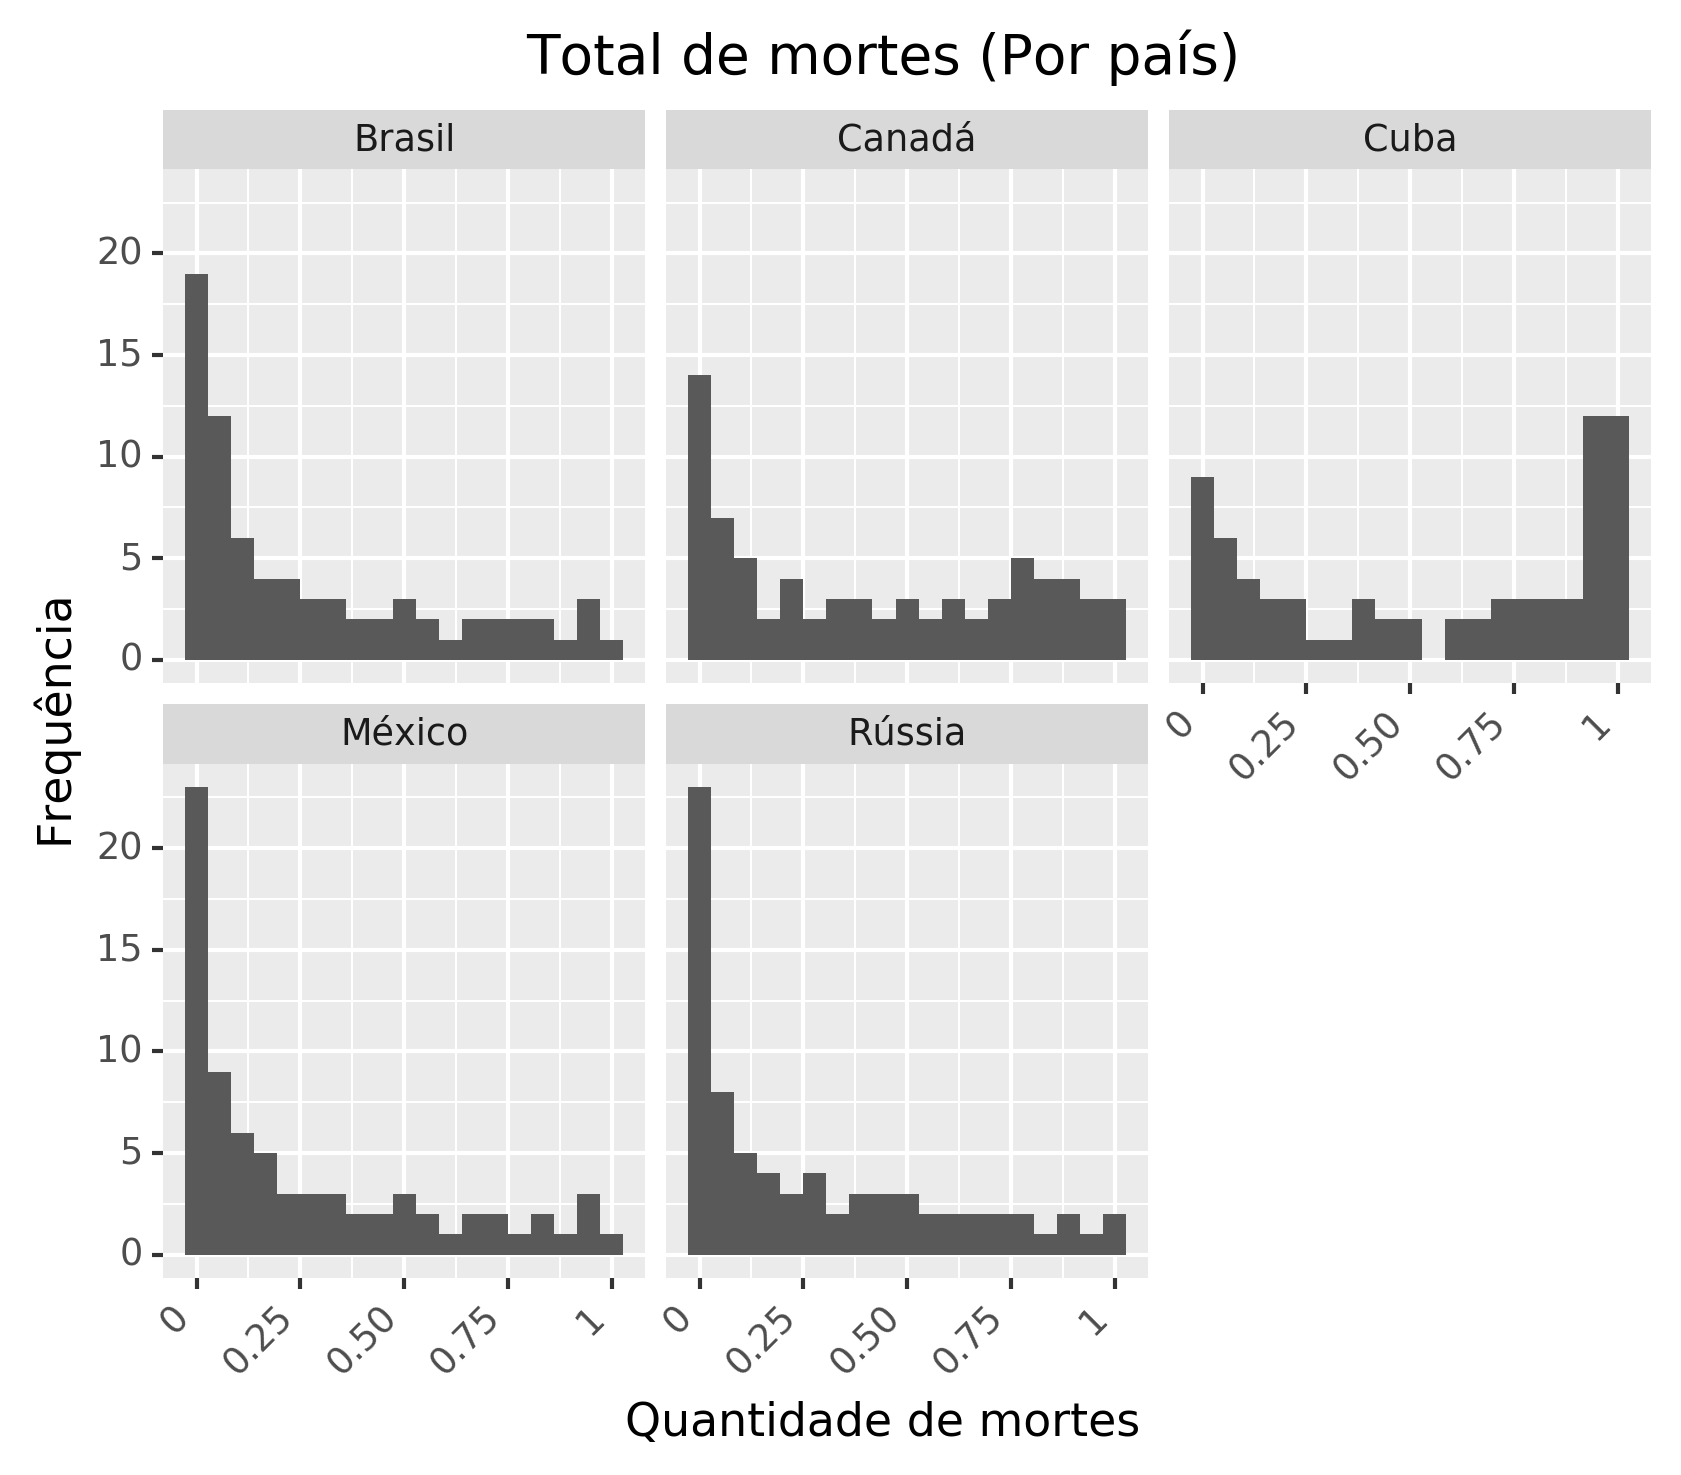

<ggplot: (8784882514422)>

In [14]:
plot_histogram_bycountry(data_owd, 'total_deaths', 'Total de mortes (Por país)', 
                                                             'Quantidade de mortes', 'Frequência')

/home/felipe/anaconda3/envs/matcomp-covid19/lib/python3.6/site-packages/plotnine/layer.py:360: PlotnineWarning: stat_bin : Removed 6 rows containing non-finite values.
  data = self.stat.compute_layer(data, params, layout)


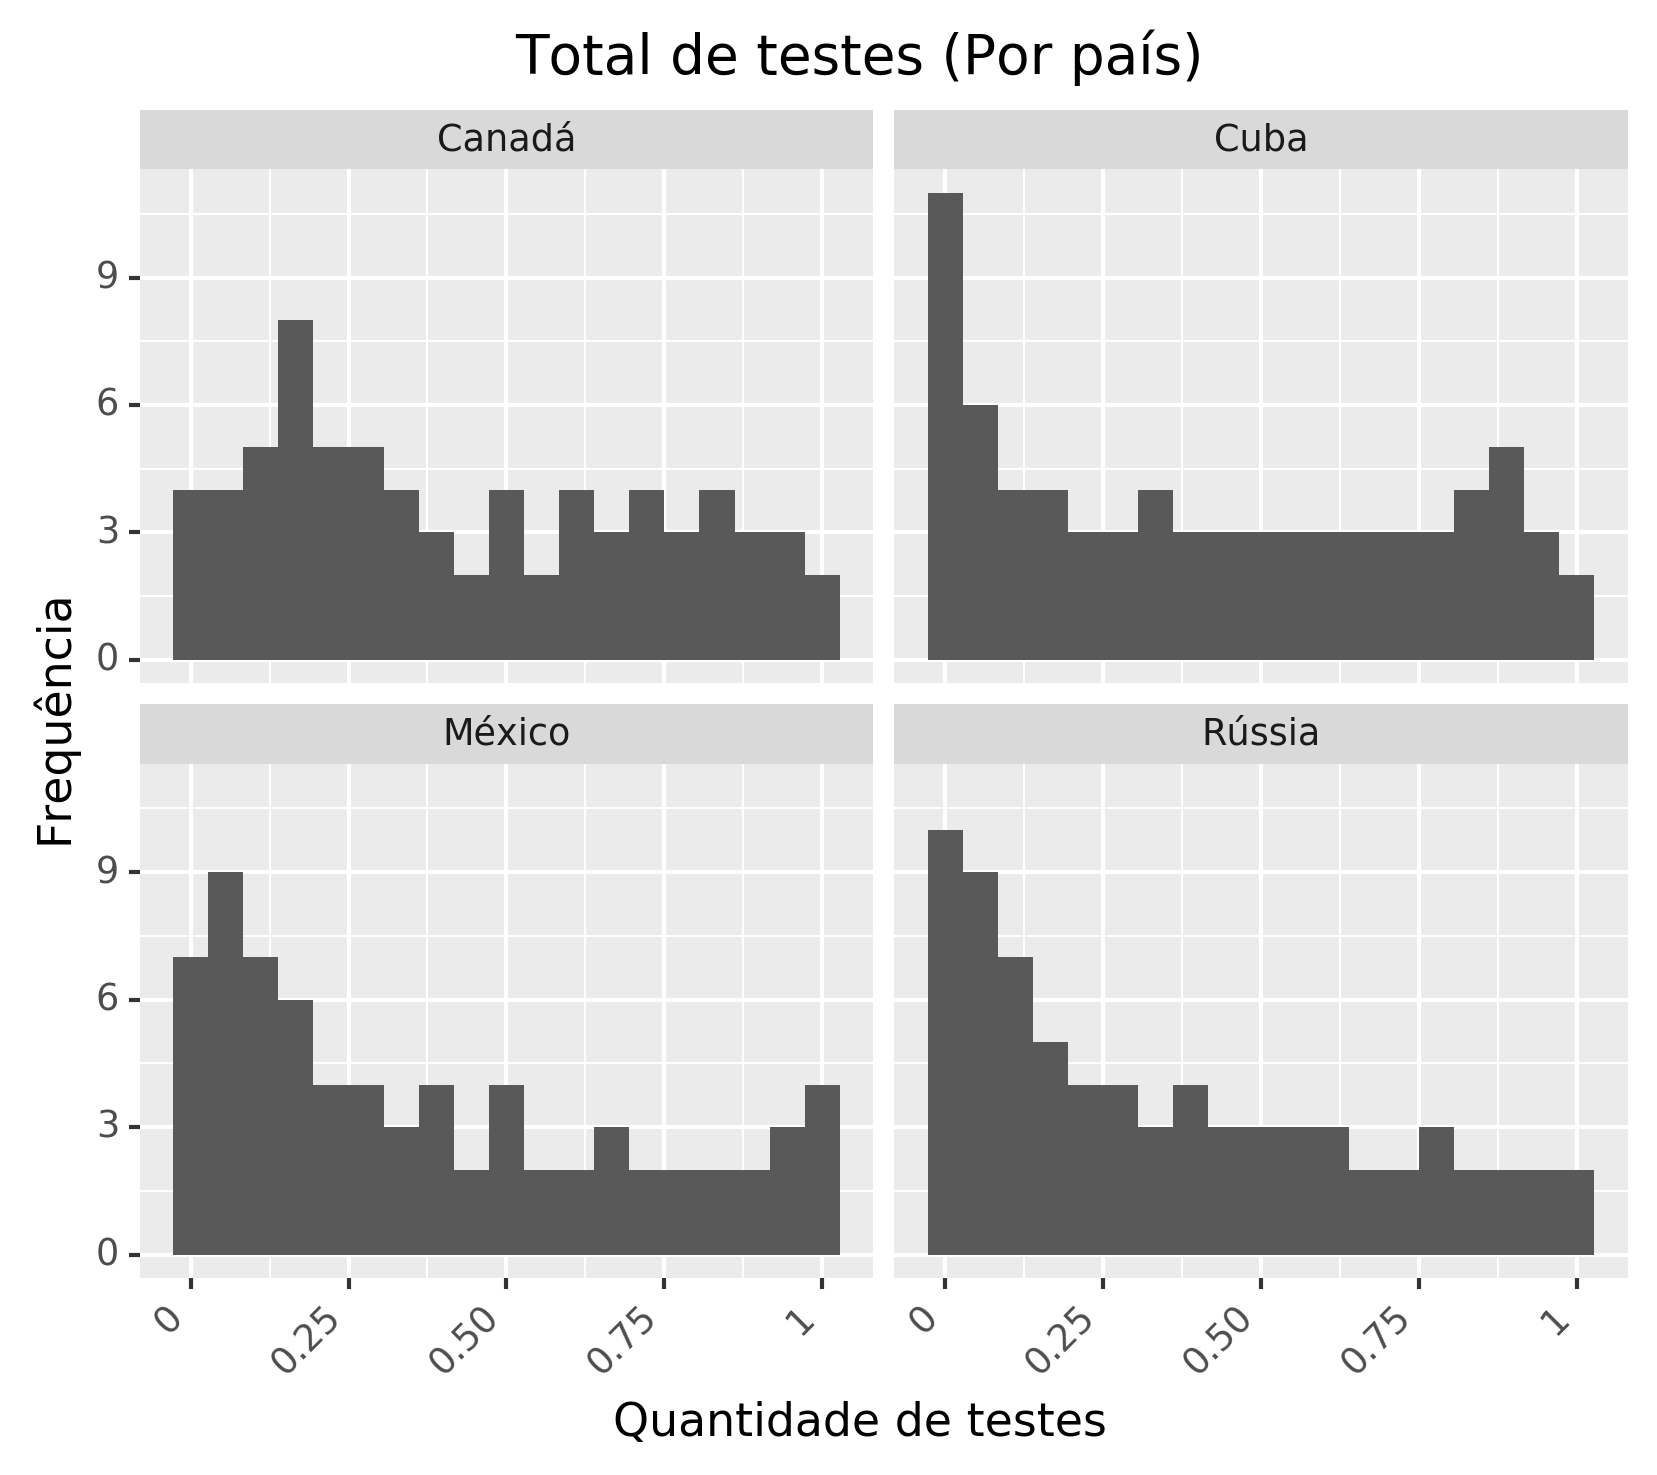

<ggplot: (8784882398847)>

In [15]:
# Excluíndo Brasil da análise
# Não contém uma quantidade suficiente de dados
_data = data_owd.copy()
_data = _data[_data['iso_code'] != 'BRA']

plot_histogram_bycountry(_data, 'total_tests', 'Total de testes (Por país)', 
                                                             'Quantidade de testes', 'Frequência')

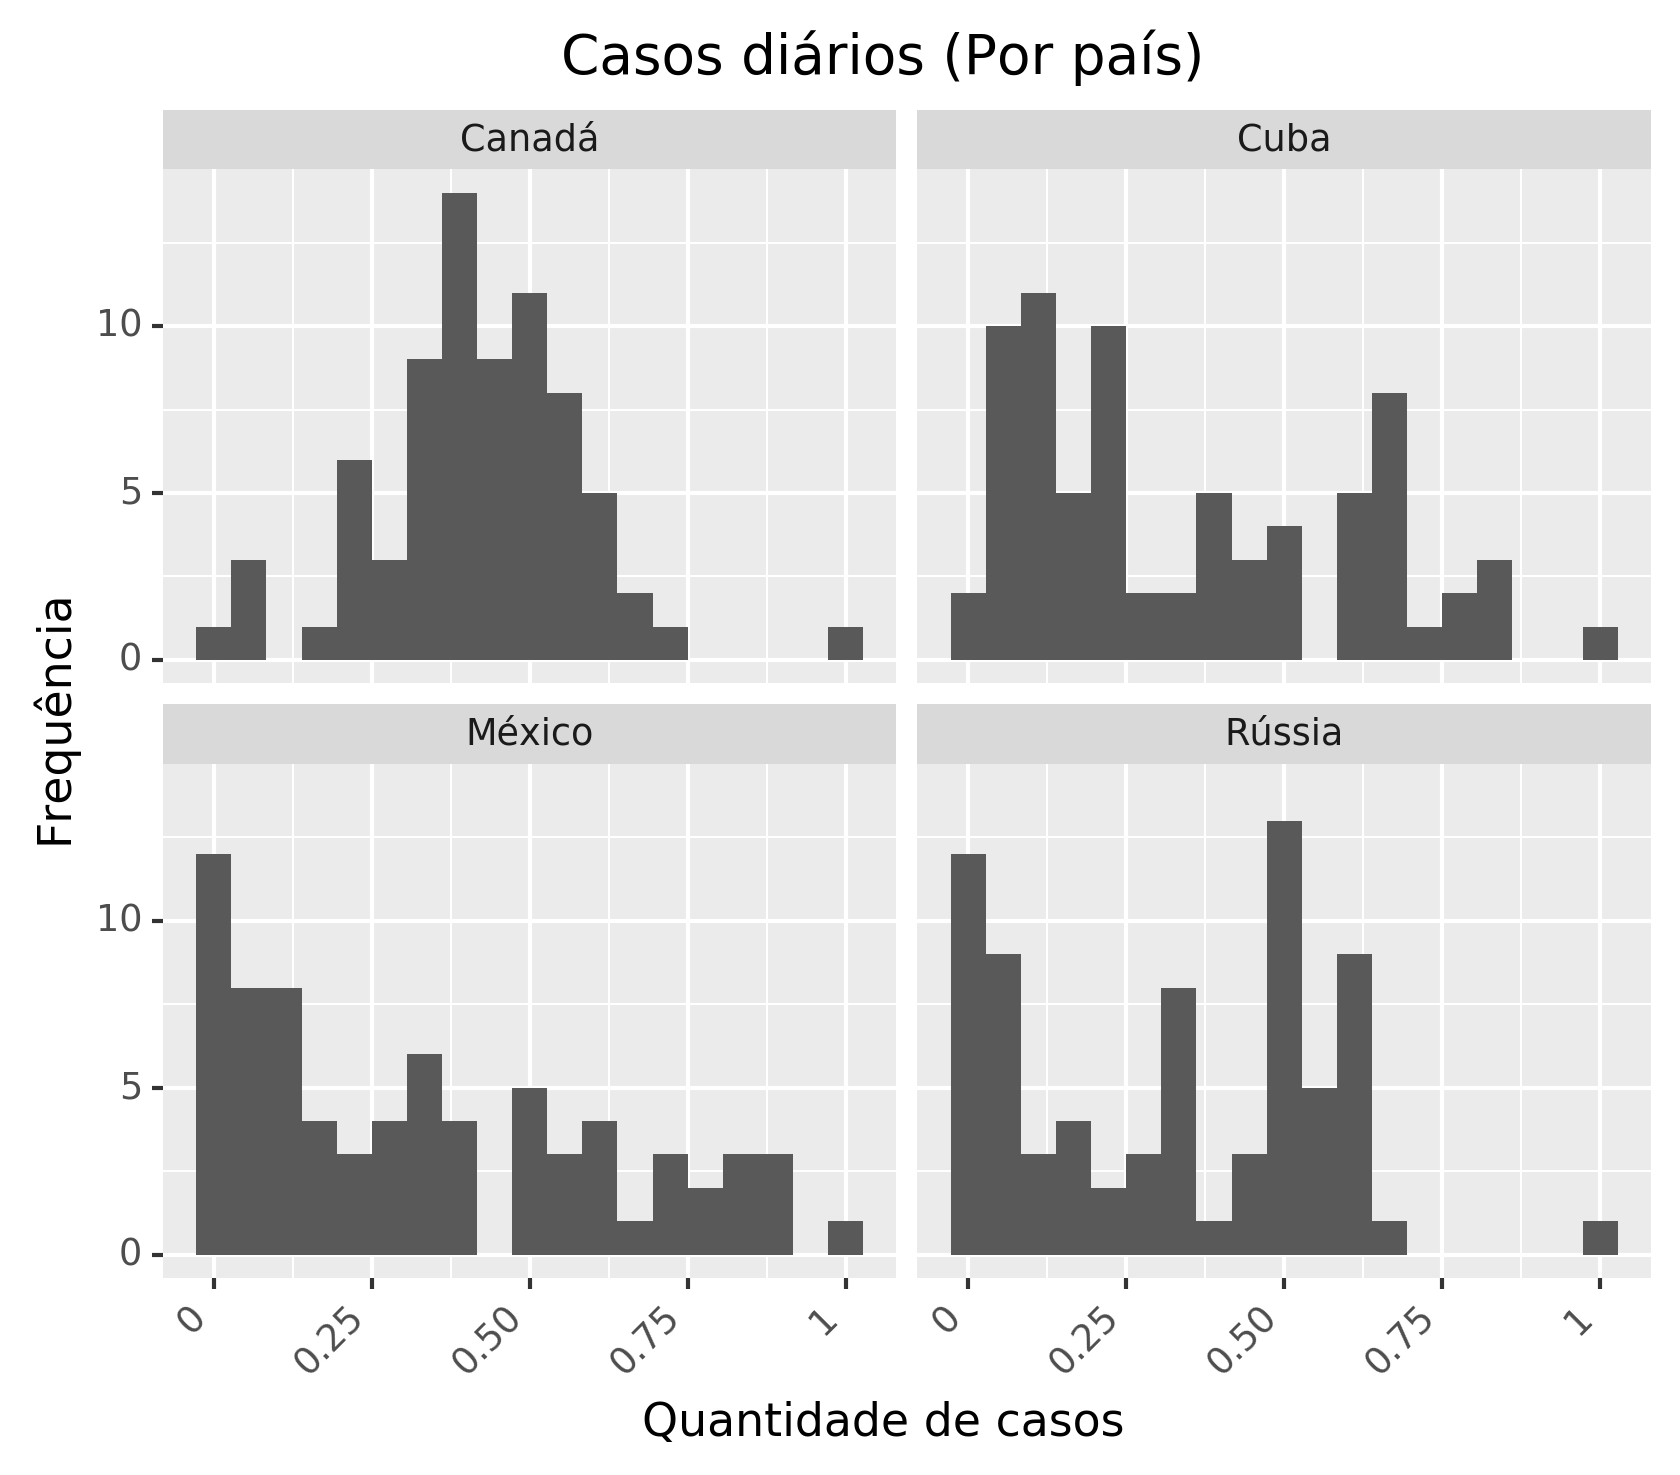

<ggplot: (-9223363251972437998)>

In [16]:
plot_histogram_bycountry(_data, 'new_cases', 'Casos diários (Por país)', 
                                                             'Quantidade de casos', 'Frequência')

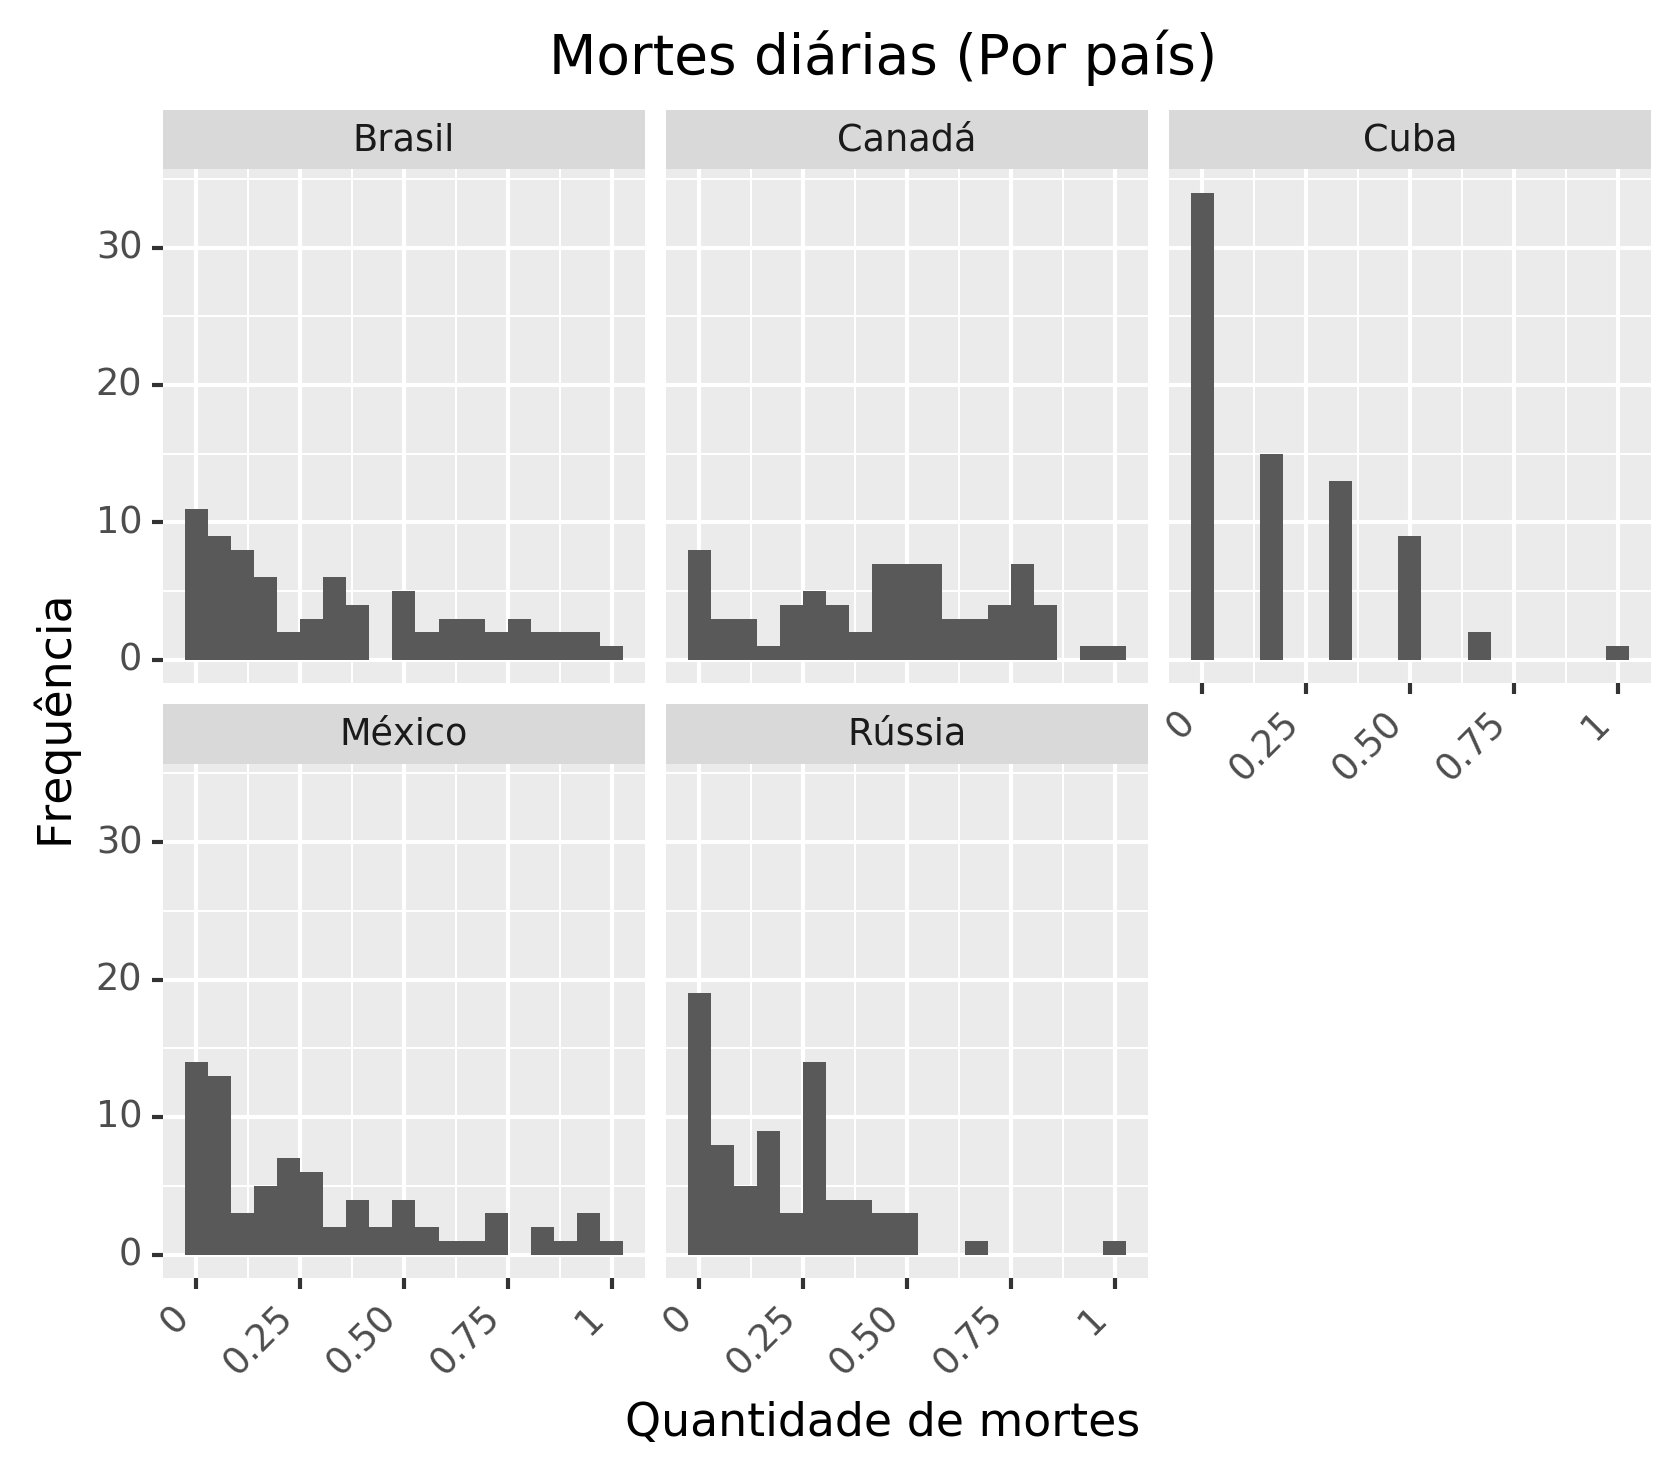

<ggplot: (-9223363251972466912)>

In [17]:
plot_histogram_bycountry(data_owd, 'new_deaths', 'Mortes diárias (Por país)', 
                                                             'Quantidade de mortes', 'Frequência')

/home/felipe/anaconda3/envs/matcomp-covid19/lib/python3.6/site-packages/plotnine/layer.py:360: PlotnineWarning: stat_bin : Removed 10 rows containing non-finite values.
  data = self.stat.compute_layer(data, params, layout)


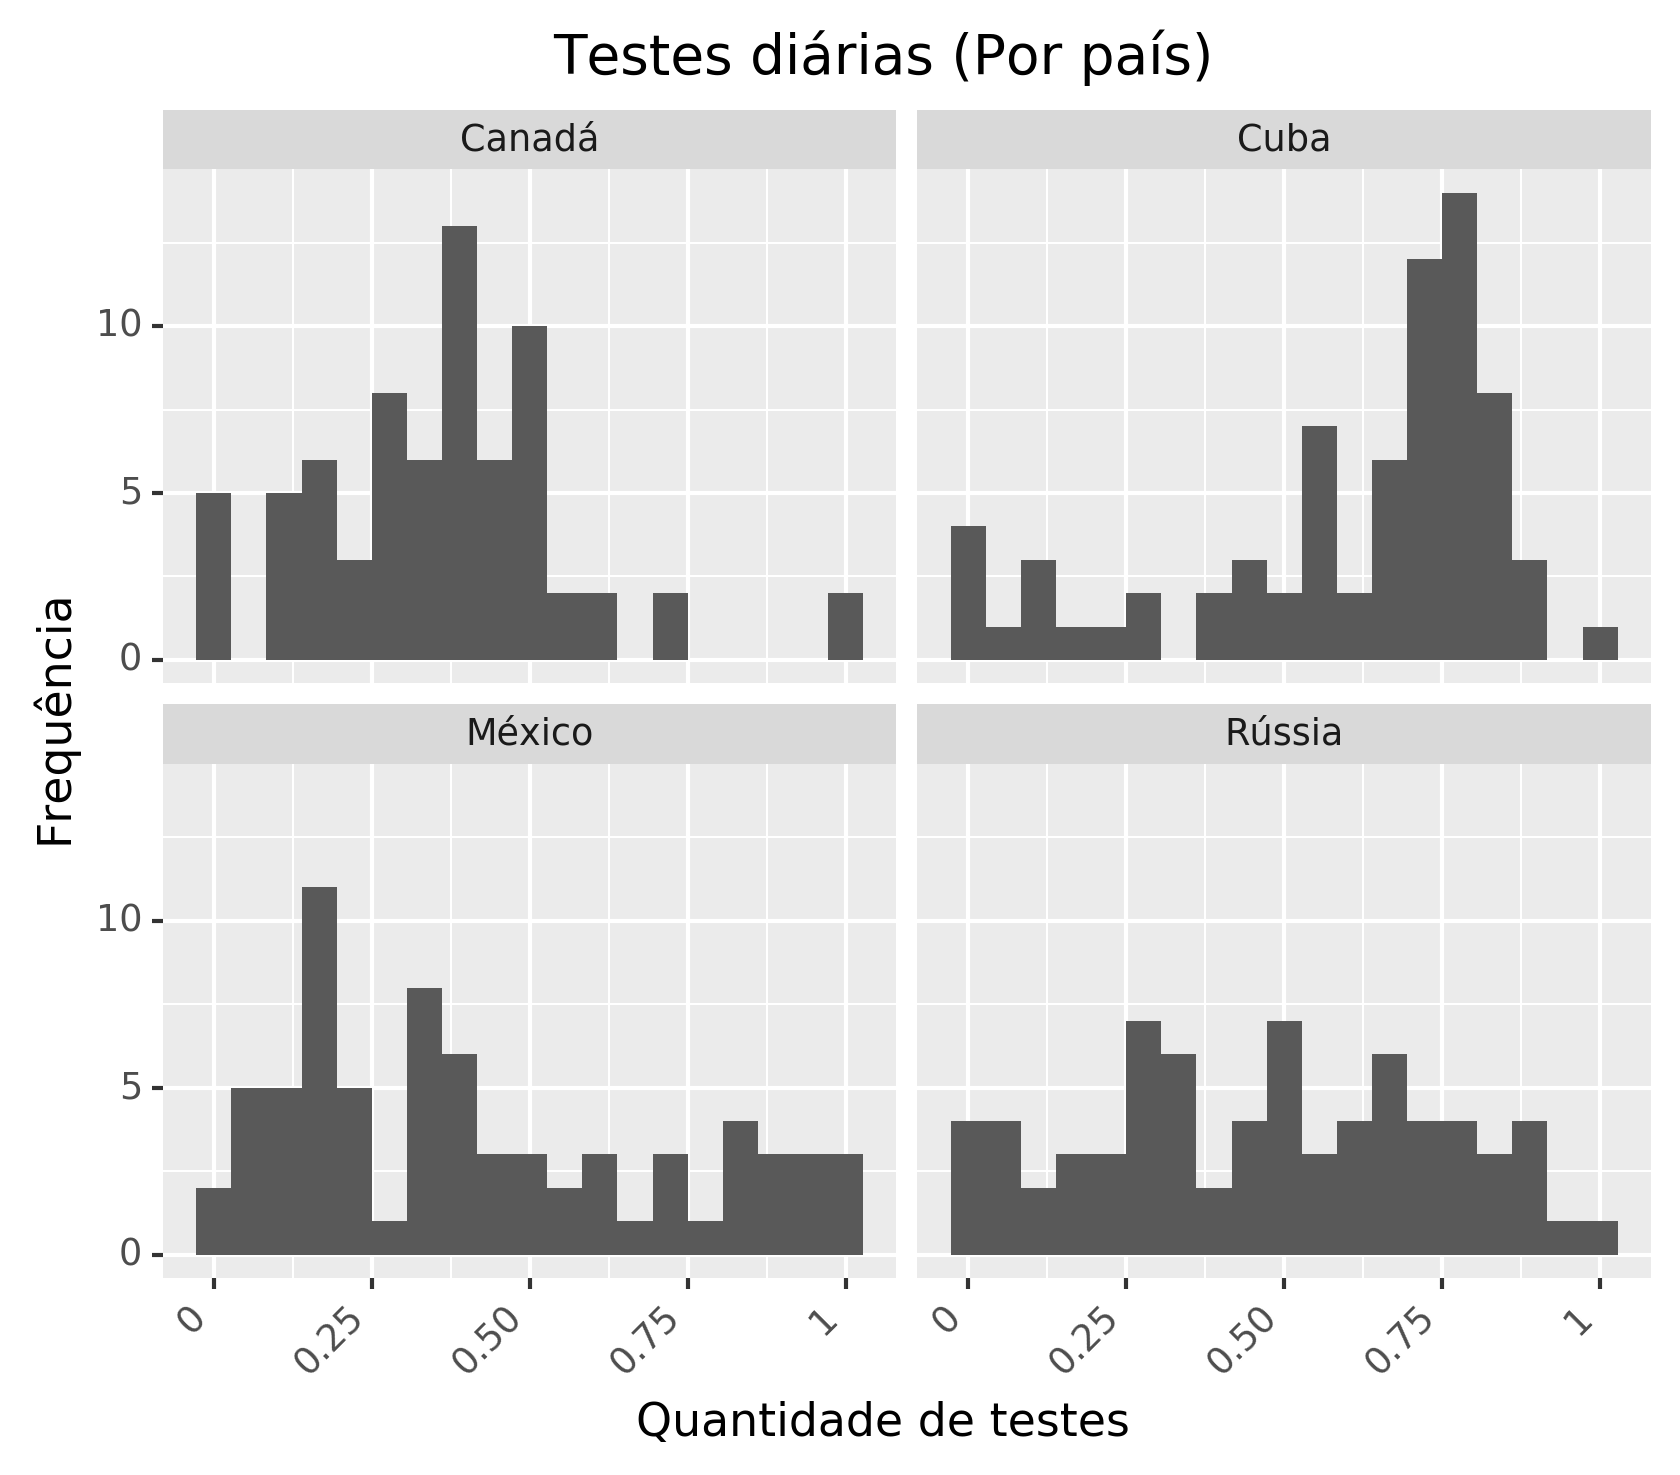

<ggplot: (8784881901211)>

In [18]:
plot_histogram_bycountry(_data, 'new_tests', 'Testes diárias (Por país)', 
                                                             'Quantidade de testes', 'Frequência')

<hr>

### Espaço de Cullen-Frey e Função de Distribuição de Probabilidade (PDF)

A aplicação da classificação do espaço de Cullen-Frey foi feita através do pacote [interfacer](https://pypi.org/project/interfacer/).


In [19]:
import interfacer.descdist
import interfacer.jupyter_helper

In [20]:
def plot_cullenfrey(data: pd.DataFrame):
    with interfacer.jupyter_helper.cellplot(width=800, height=640):
        interfacer.descdist.descdist(data, boot = 250)

##### Brasil - Quantidade total de casos

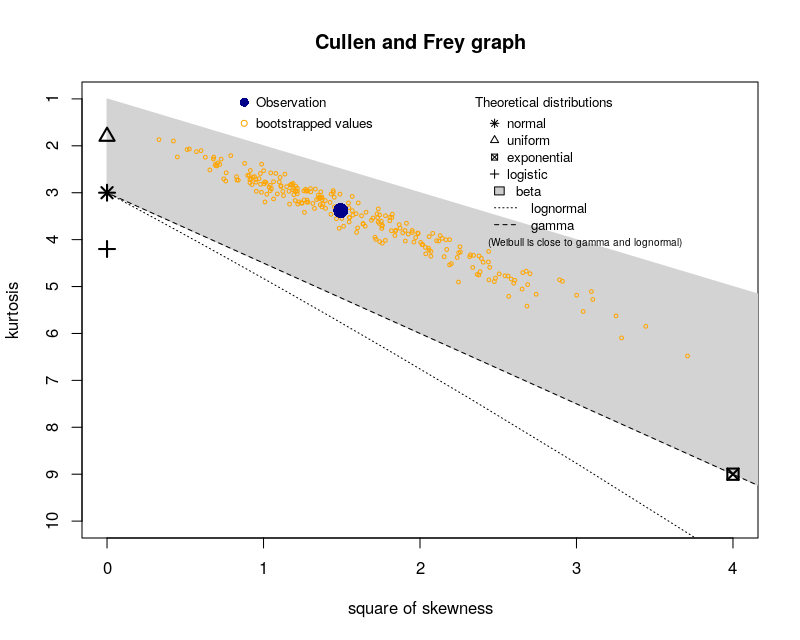

In [21]:
bra = data_owd[data_owd['iso_code'] == 'BRA']

plot_cullenfrey(bra.total_cases)

##### Brasil - Quantidade diária de casos

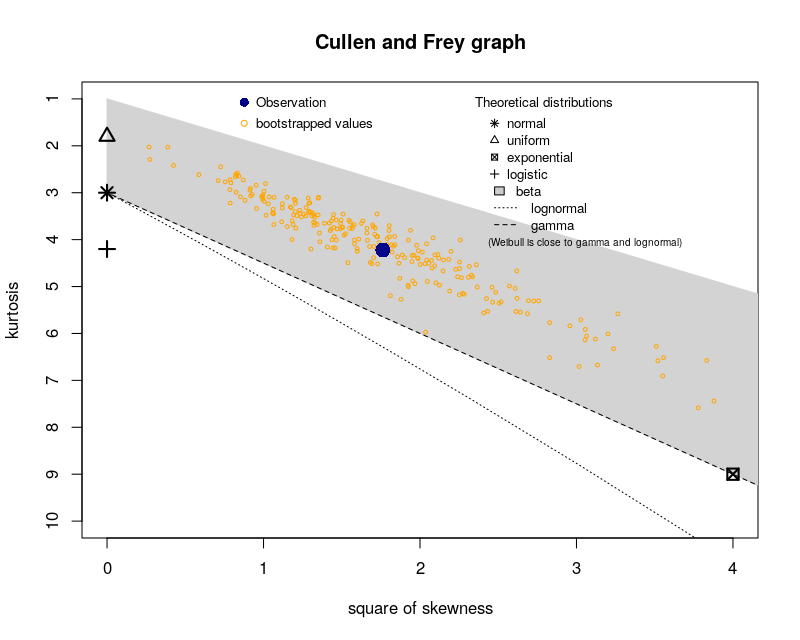

In [22]:
plot_cullenfrey(bra.new_cases)

##### Brasil - Quantidade total de mortes

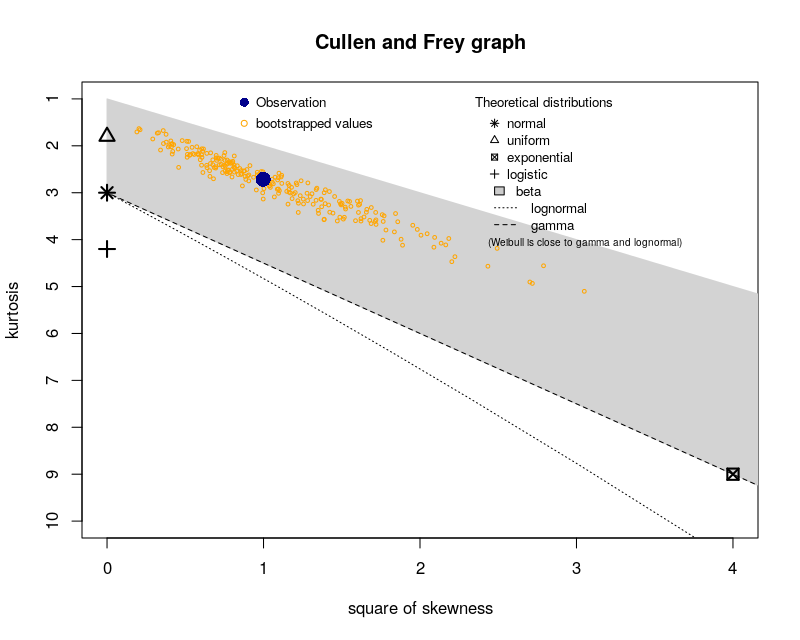

In [23]:
plot_cullenfrey(bra.total_deaths)

##### Brasil - Quantidade diária de mortes

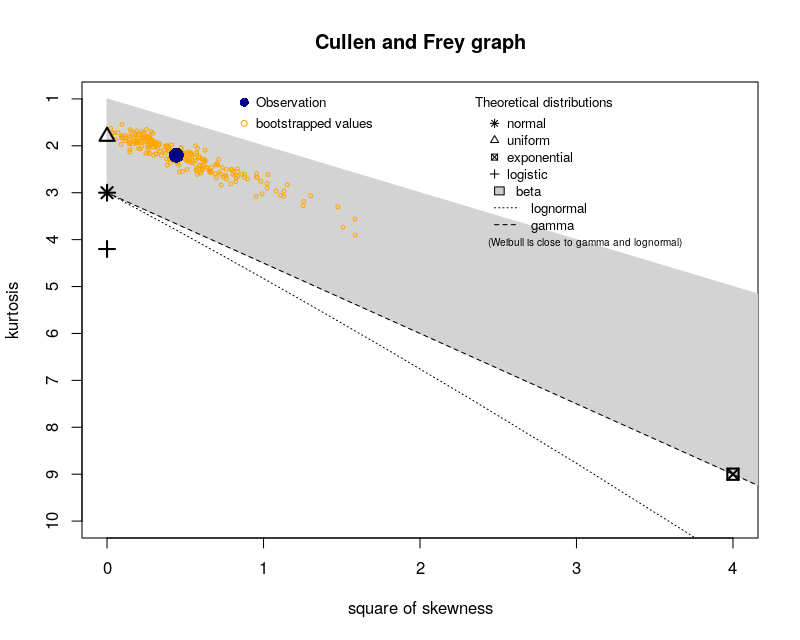

In [24]:
plot_cullenfrey(bra.new_deaths)

##### Canadá - Quantidade total de casos

In [25]:
can = data_owd[data_owd['iso_code'] == 'CAN']

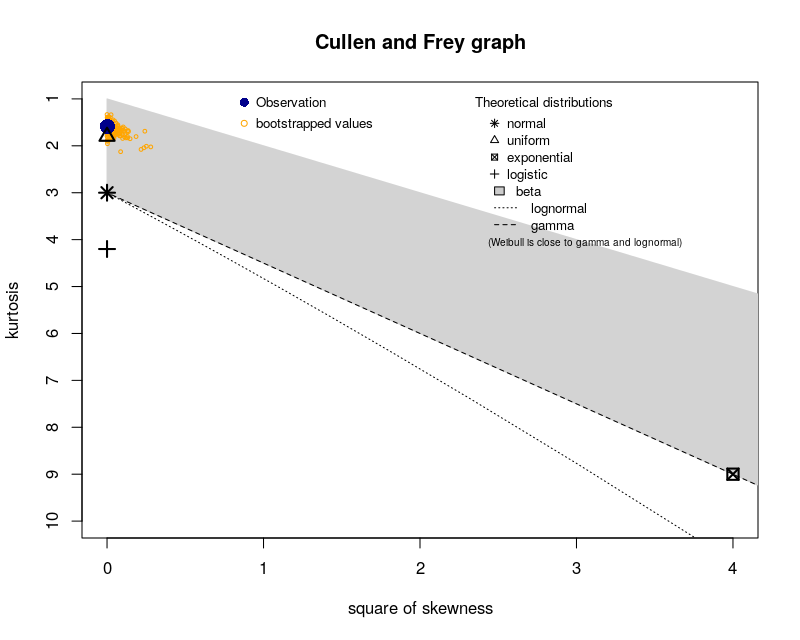

In [26]:
plot_cullenfrey(can.total_cases)

### Ajuste de PDF

In [31]:
def plot_density_bycountry(data, column, title, fillby , x_lab, y_lab): 
    _data = standardize_bycountry(data, column)
    
    return (
        ggplot(_data, aes(x = column, fill = fillby)) 
            + geom_density()
            + ggtitle(title)
            + xlab(x_lab) + ylab(y_lab)
            + facet_wrap('~iso_code', labeller = labelerfnc)
            + theme(axis_text_x = element_text(angle = 45, hjust = 1), dpi = 300)
    )

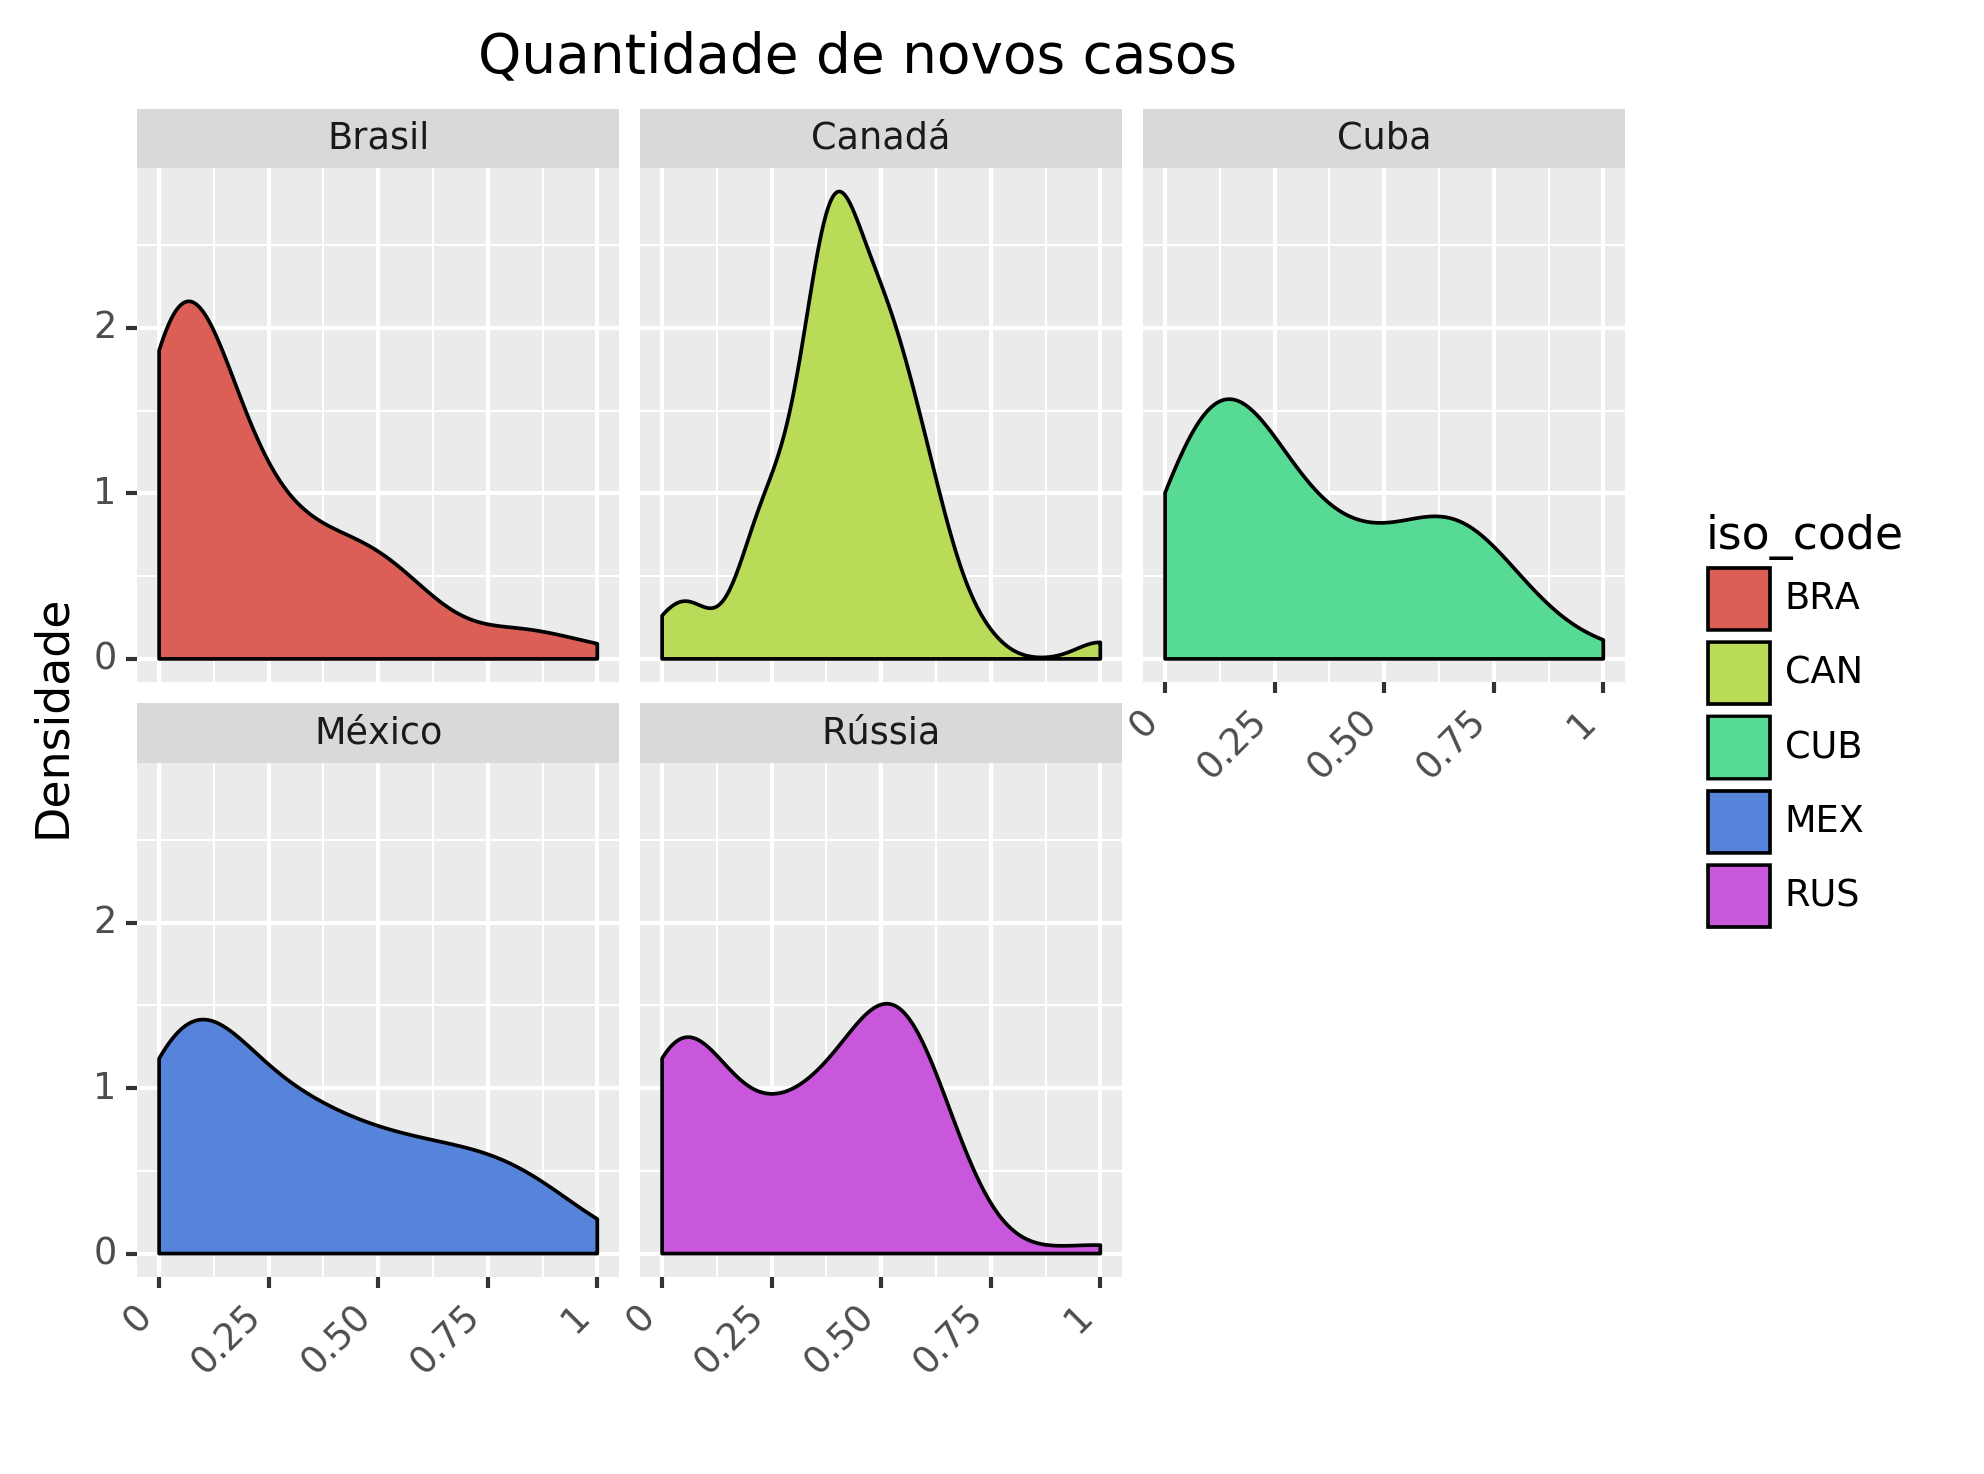

<ggplot: (-9223363251972563403)>

In [32]:
plot_density_bycountry(data_owd, 'new_cases', 'Quantidade de novos casos' ,'iso_code', ' ', 'Densidade')

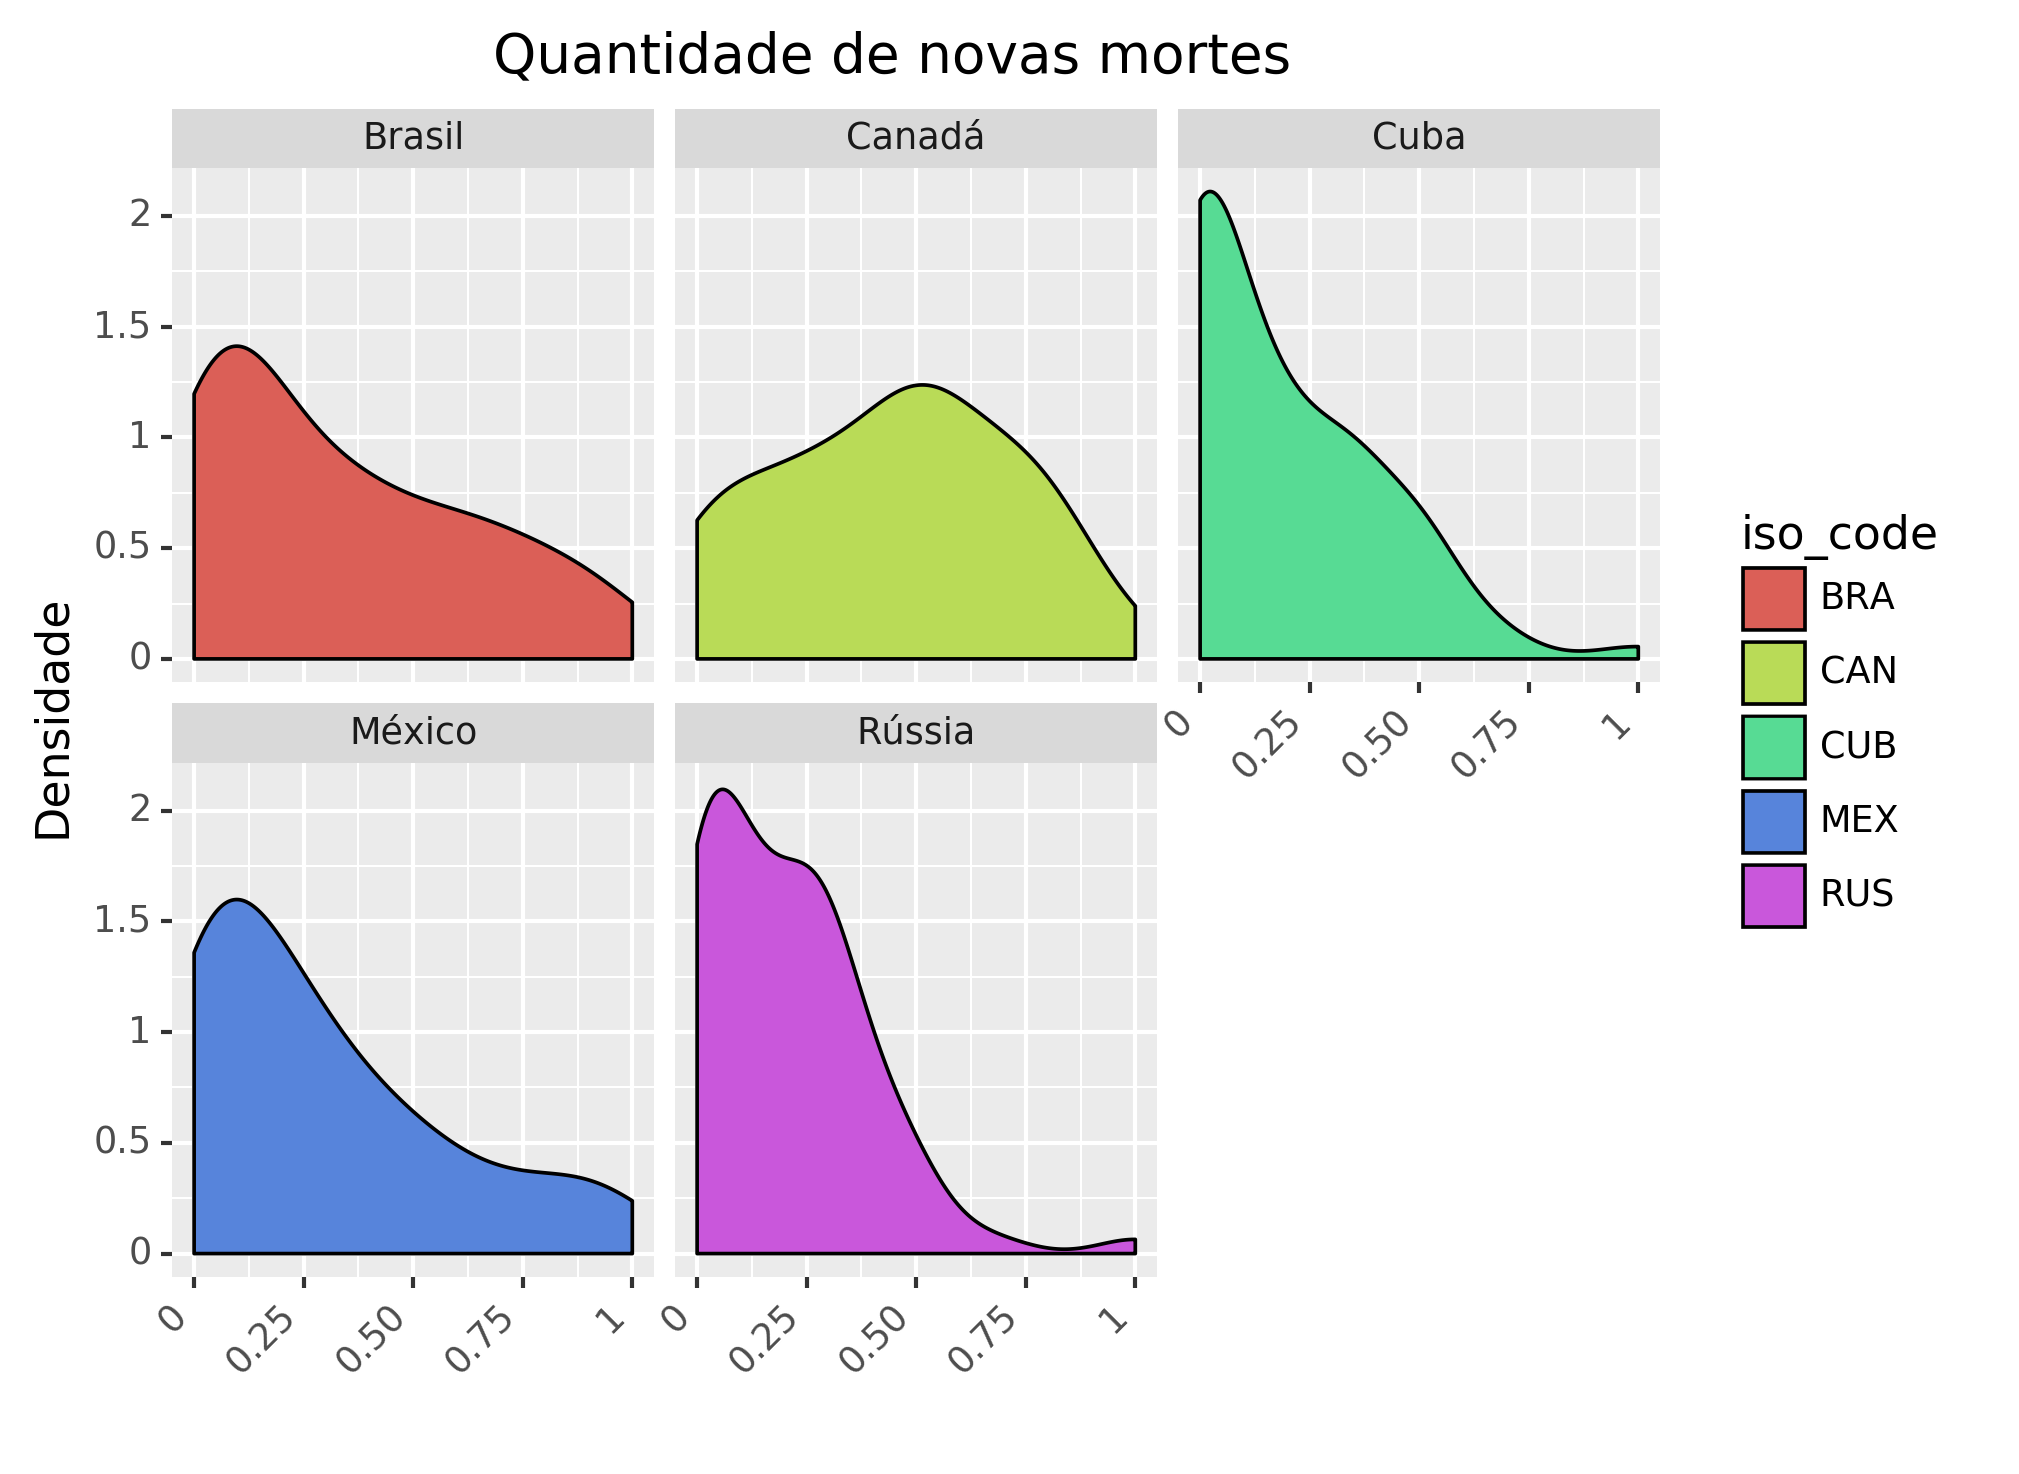

<ggplot: (-9223363251972309188)>

In [33]:
plot_density_bycountry(data_owd, 'new_deaths', 'Quantidade de novas mortes' ,'iso_code', ' ', 'Densidade')

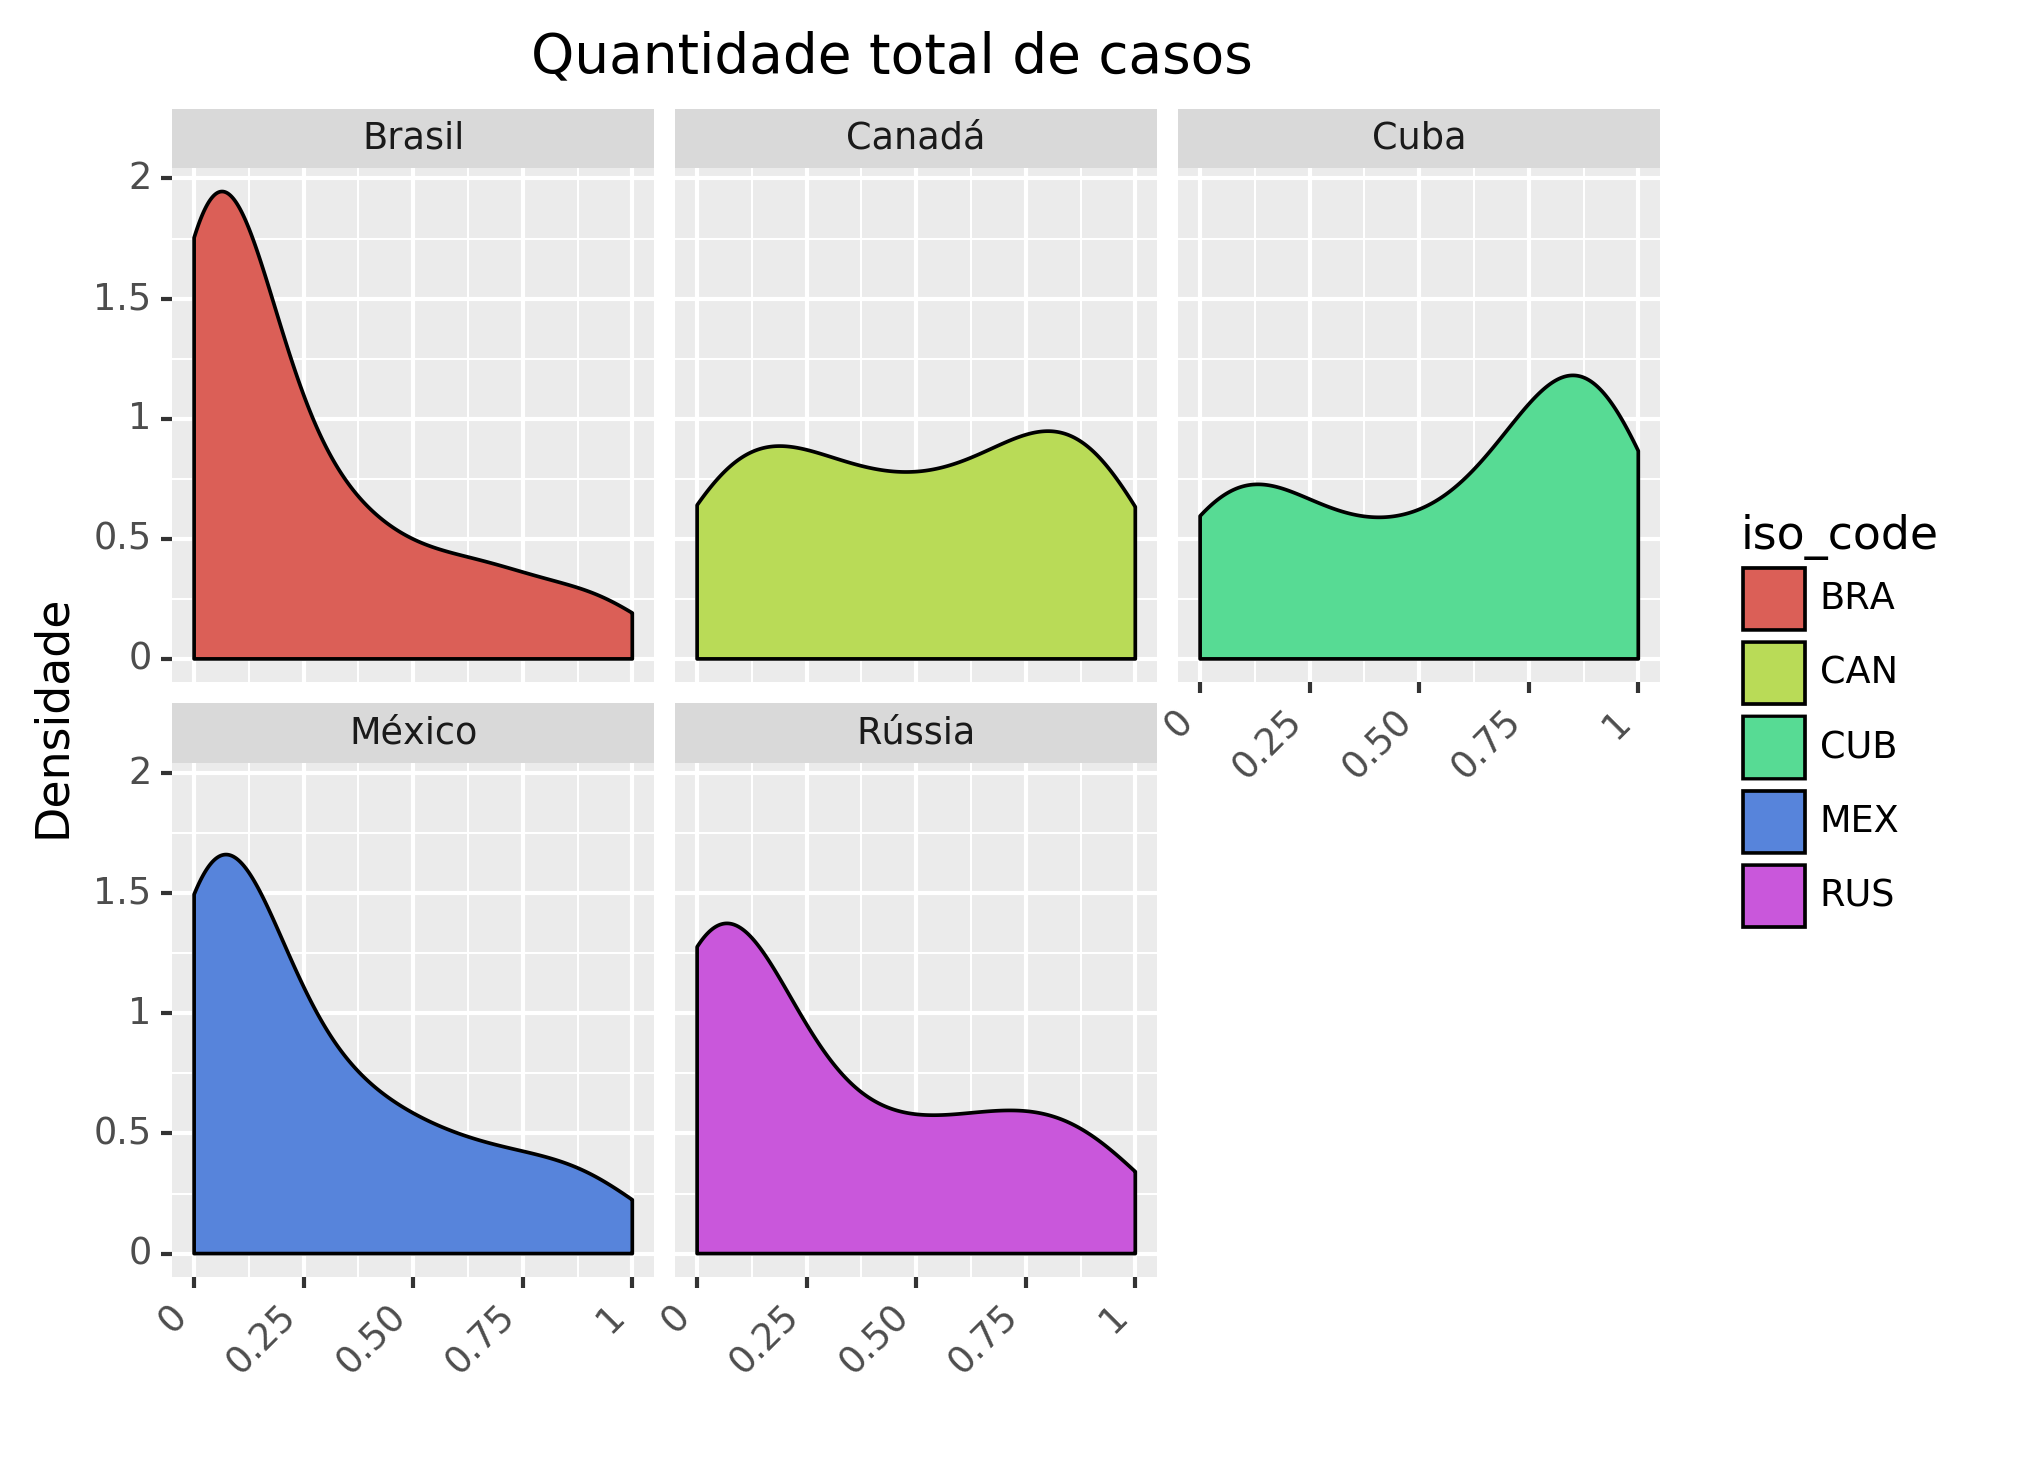

<ggplot: (8784875711524)>

In [34]:
plot_density_bycountry(data_owd, 'total_cases', 'Quantidade total de casos' ,'iso_code', ' ', 'Densidade')

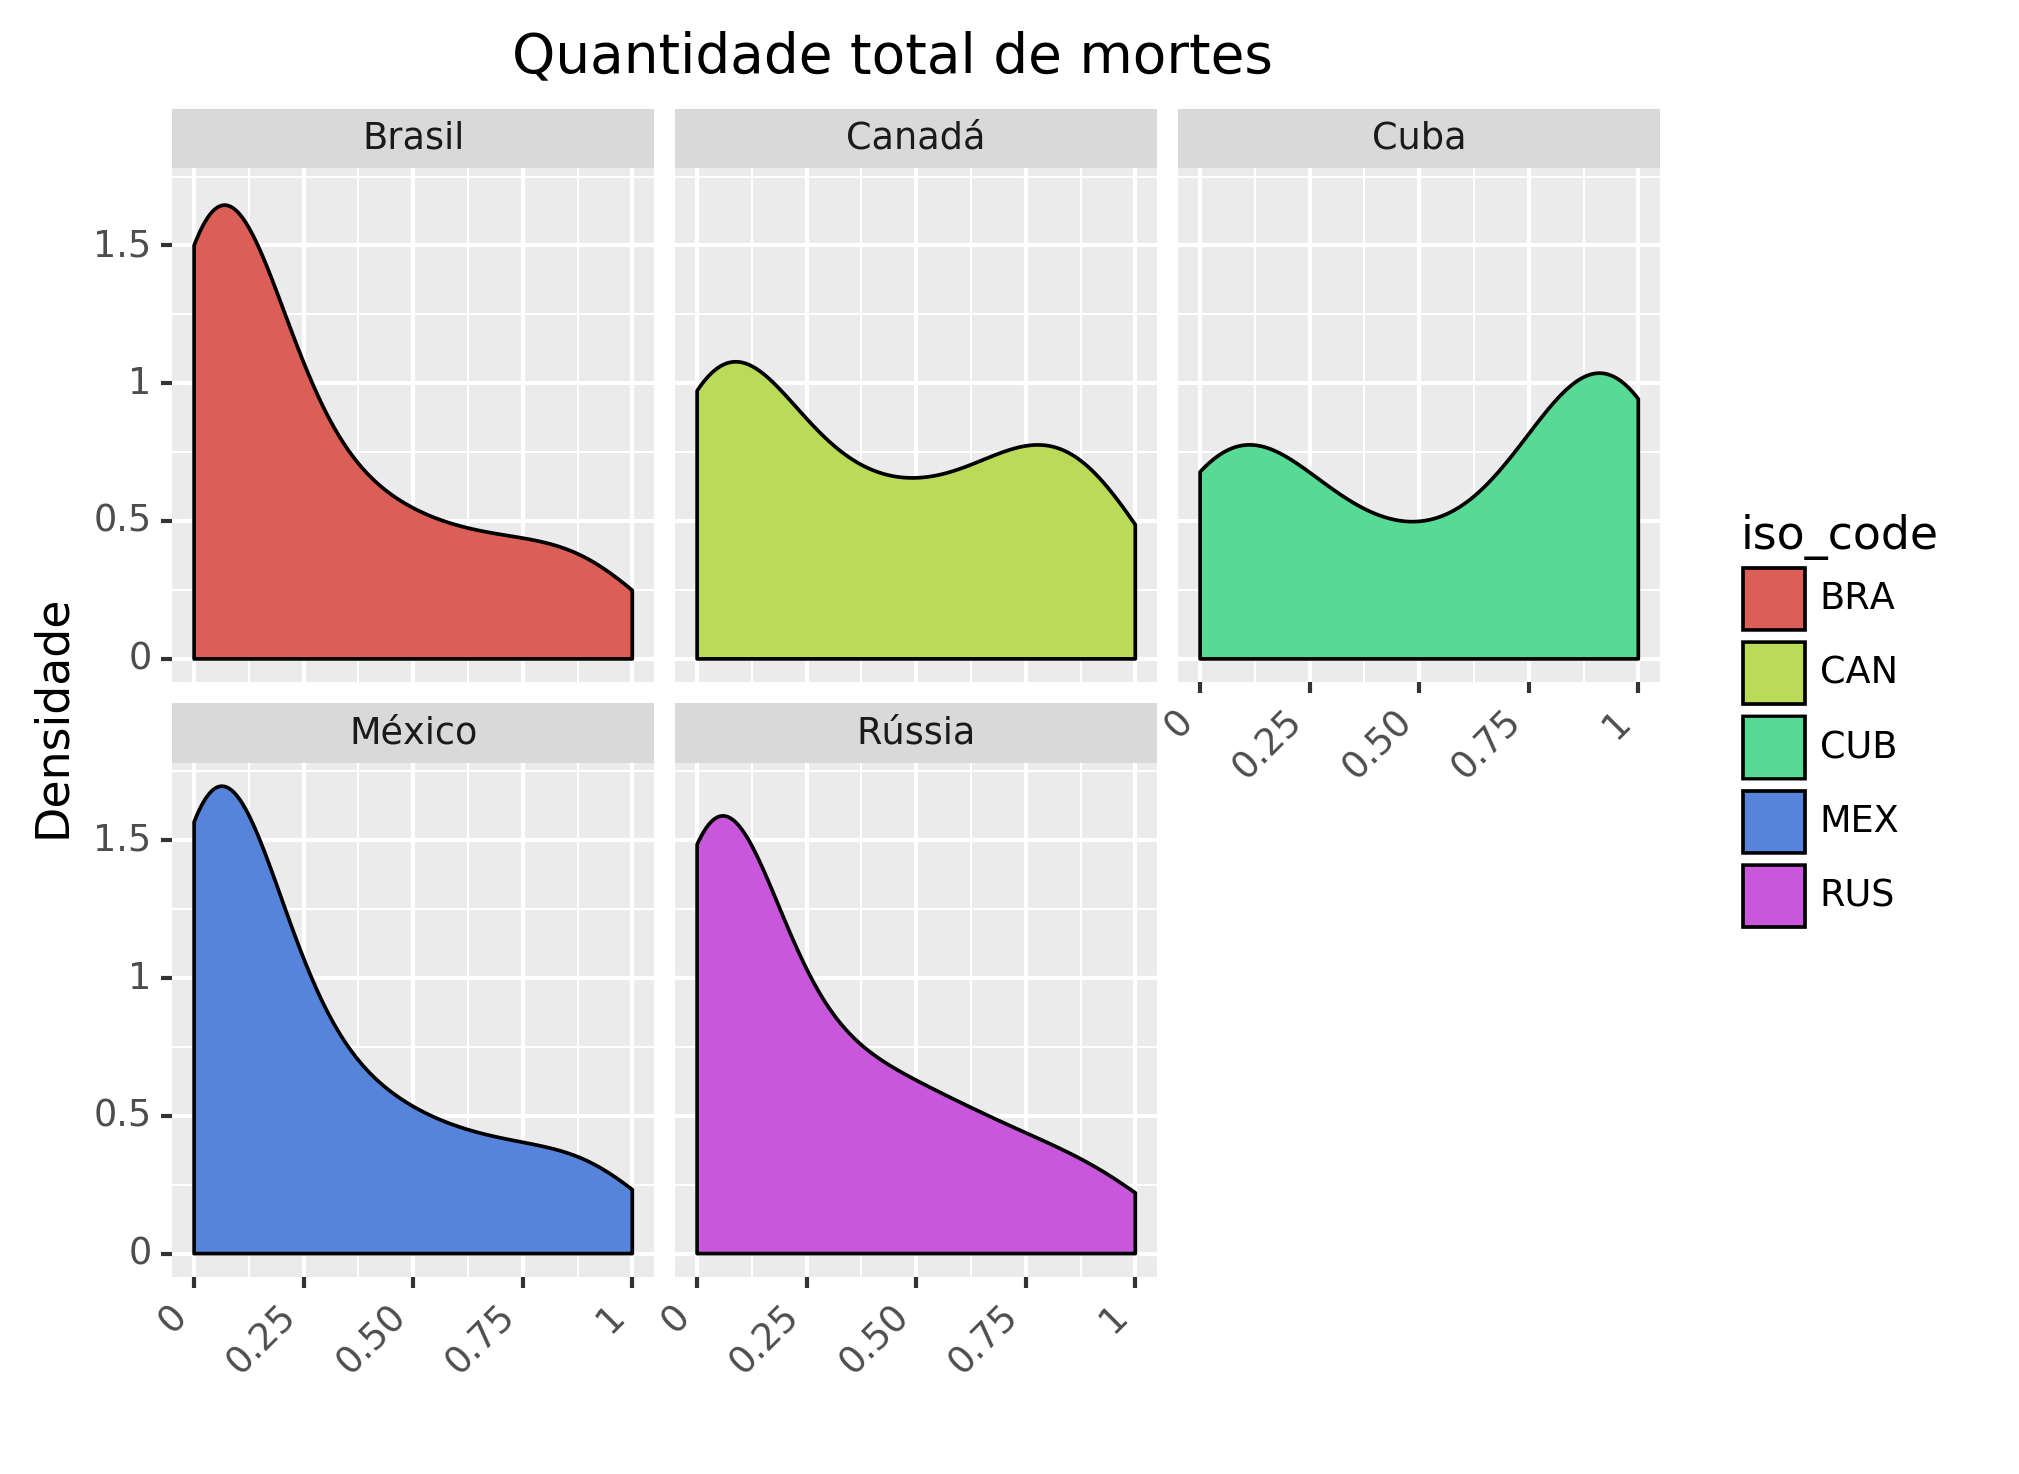

<ggplot: (-9223363251979464090)>

In [45]:
plot_density_bycountry(data_owd, 'total_deaths', 'Quantidade total de mortes' ,'iso_code', ' ', 'Densidade')

/home/felipe/anaconda3/envs/matcomp-covid19/lib/python3.6/site-packages/plotnine/layer.py:360: PlotnineWarning: stat_density : Removed 77 rows containing non-finite values.
  data = self.stat.compute_layer(data, params, layout)


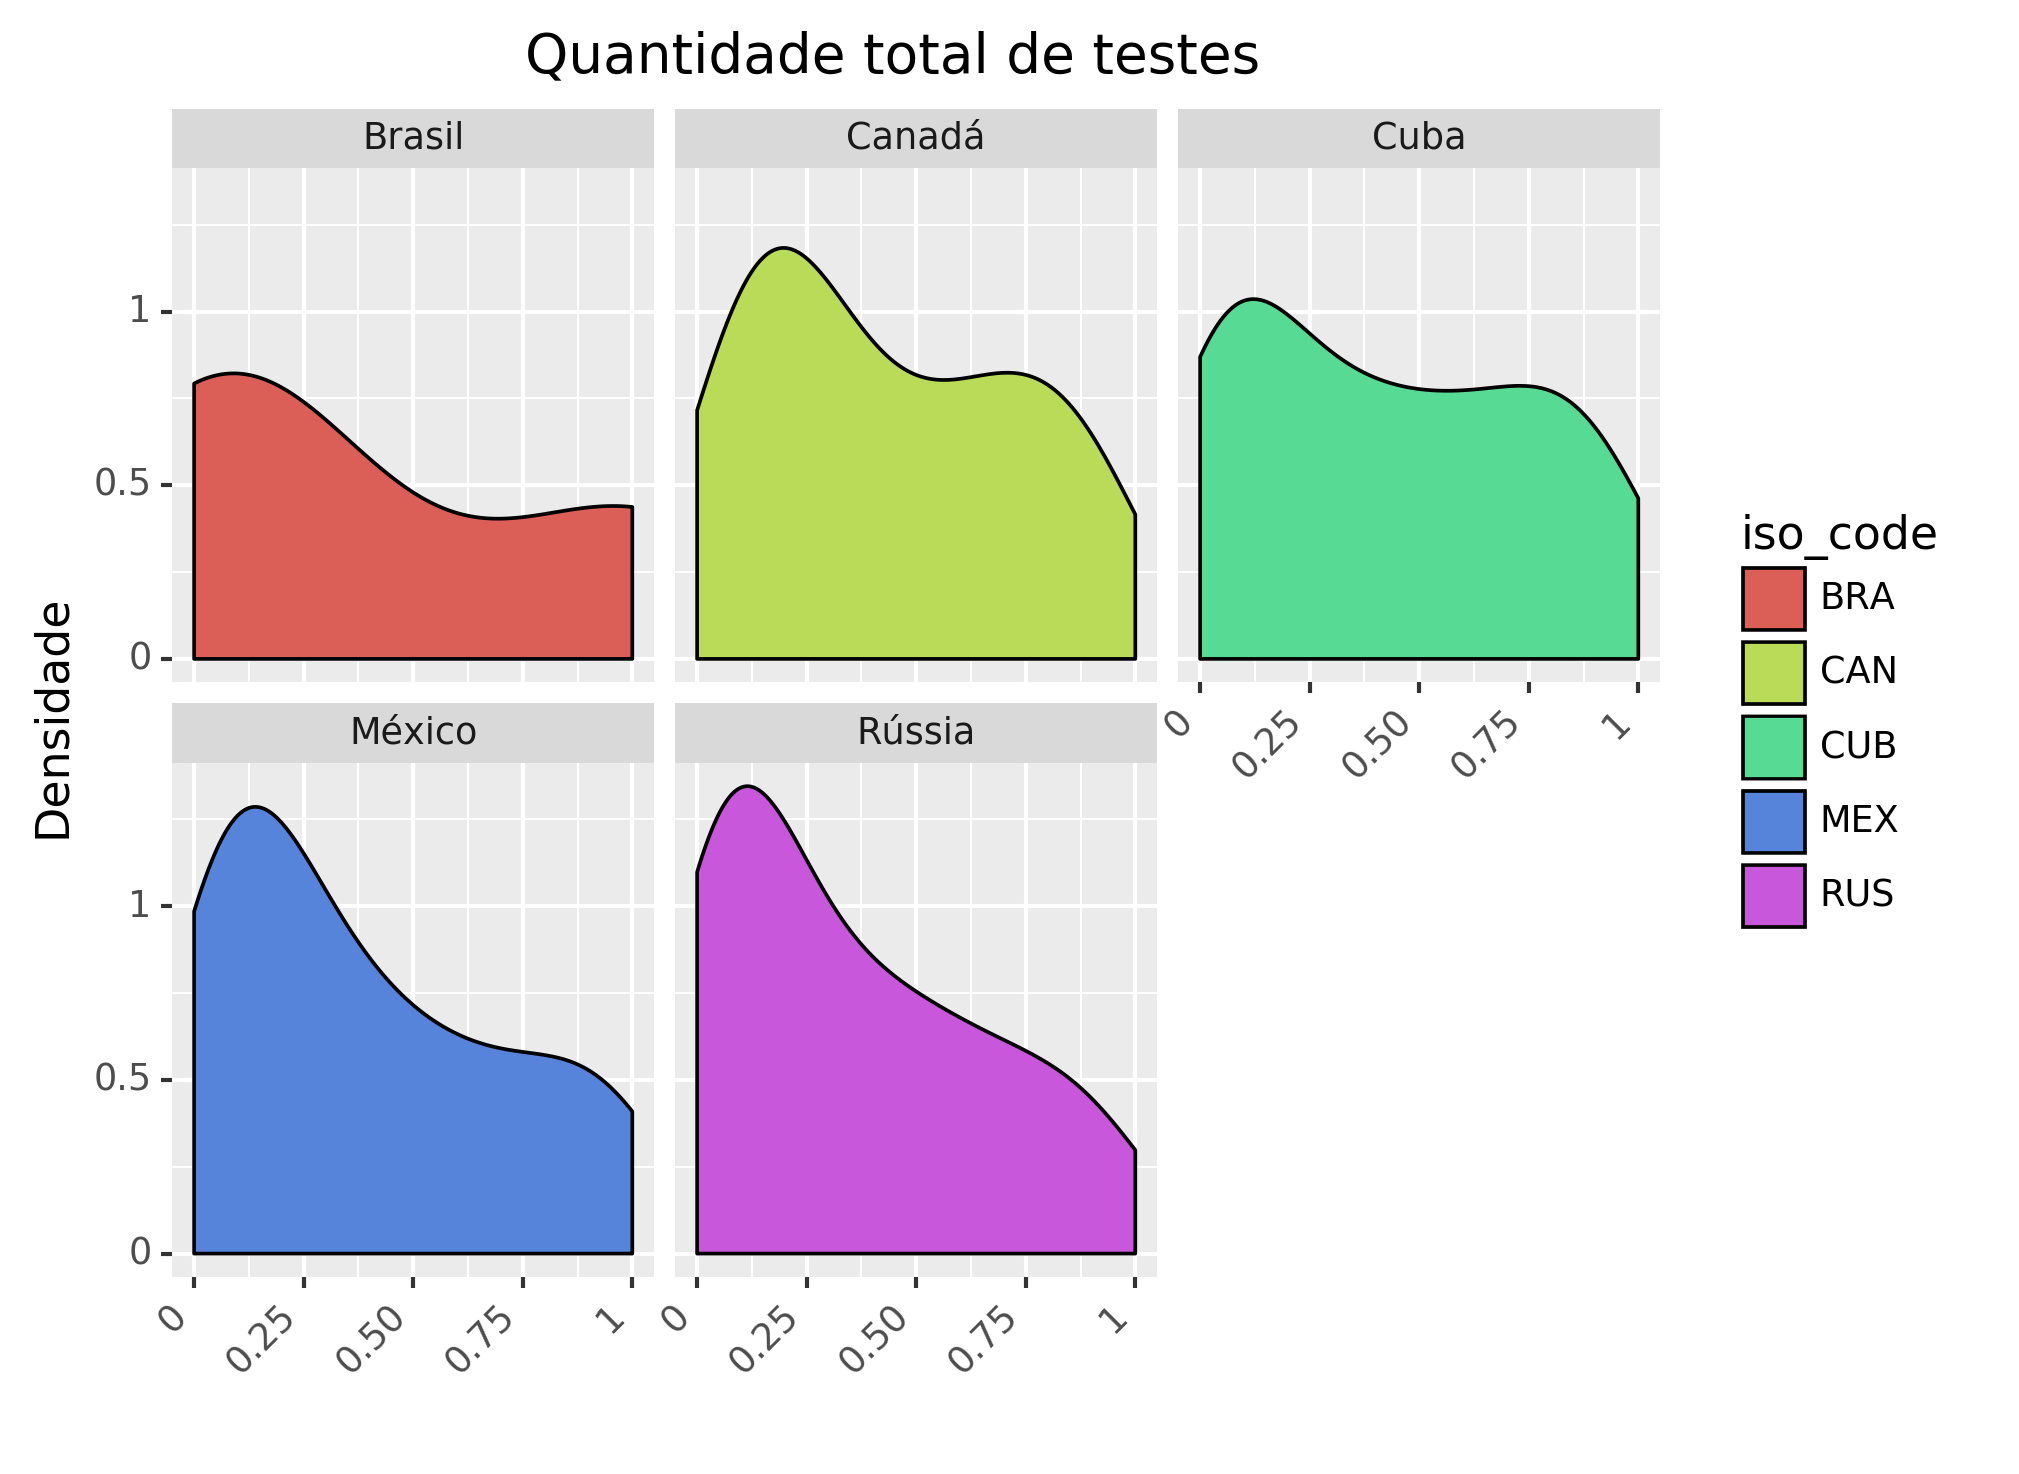

<ggplot: (8784882526072)>

In [48]:
plot_density_bycountry(data_owd, 'total_tests', 'Quantidade total de testes' ,'iso_code', ' ', 'Densidade')

/home/felipe/anaconda3/envs/matcomp-covid19/lib/python3.6/site-packages/plotnine/layer.py:360: PlotnineWarning: stat_density : Removed 84 rows containing non-finite values.
  data = self.stat.compute_layer(data, params, layout)


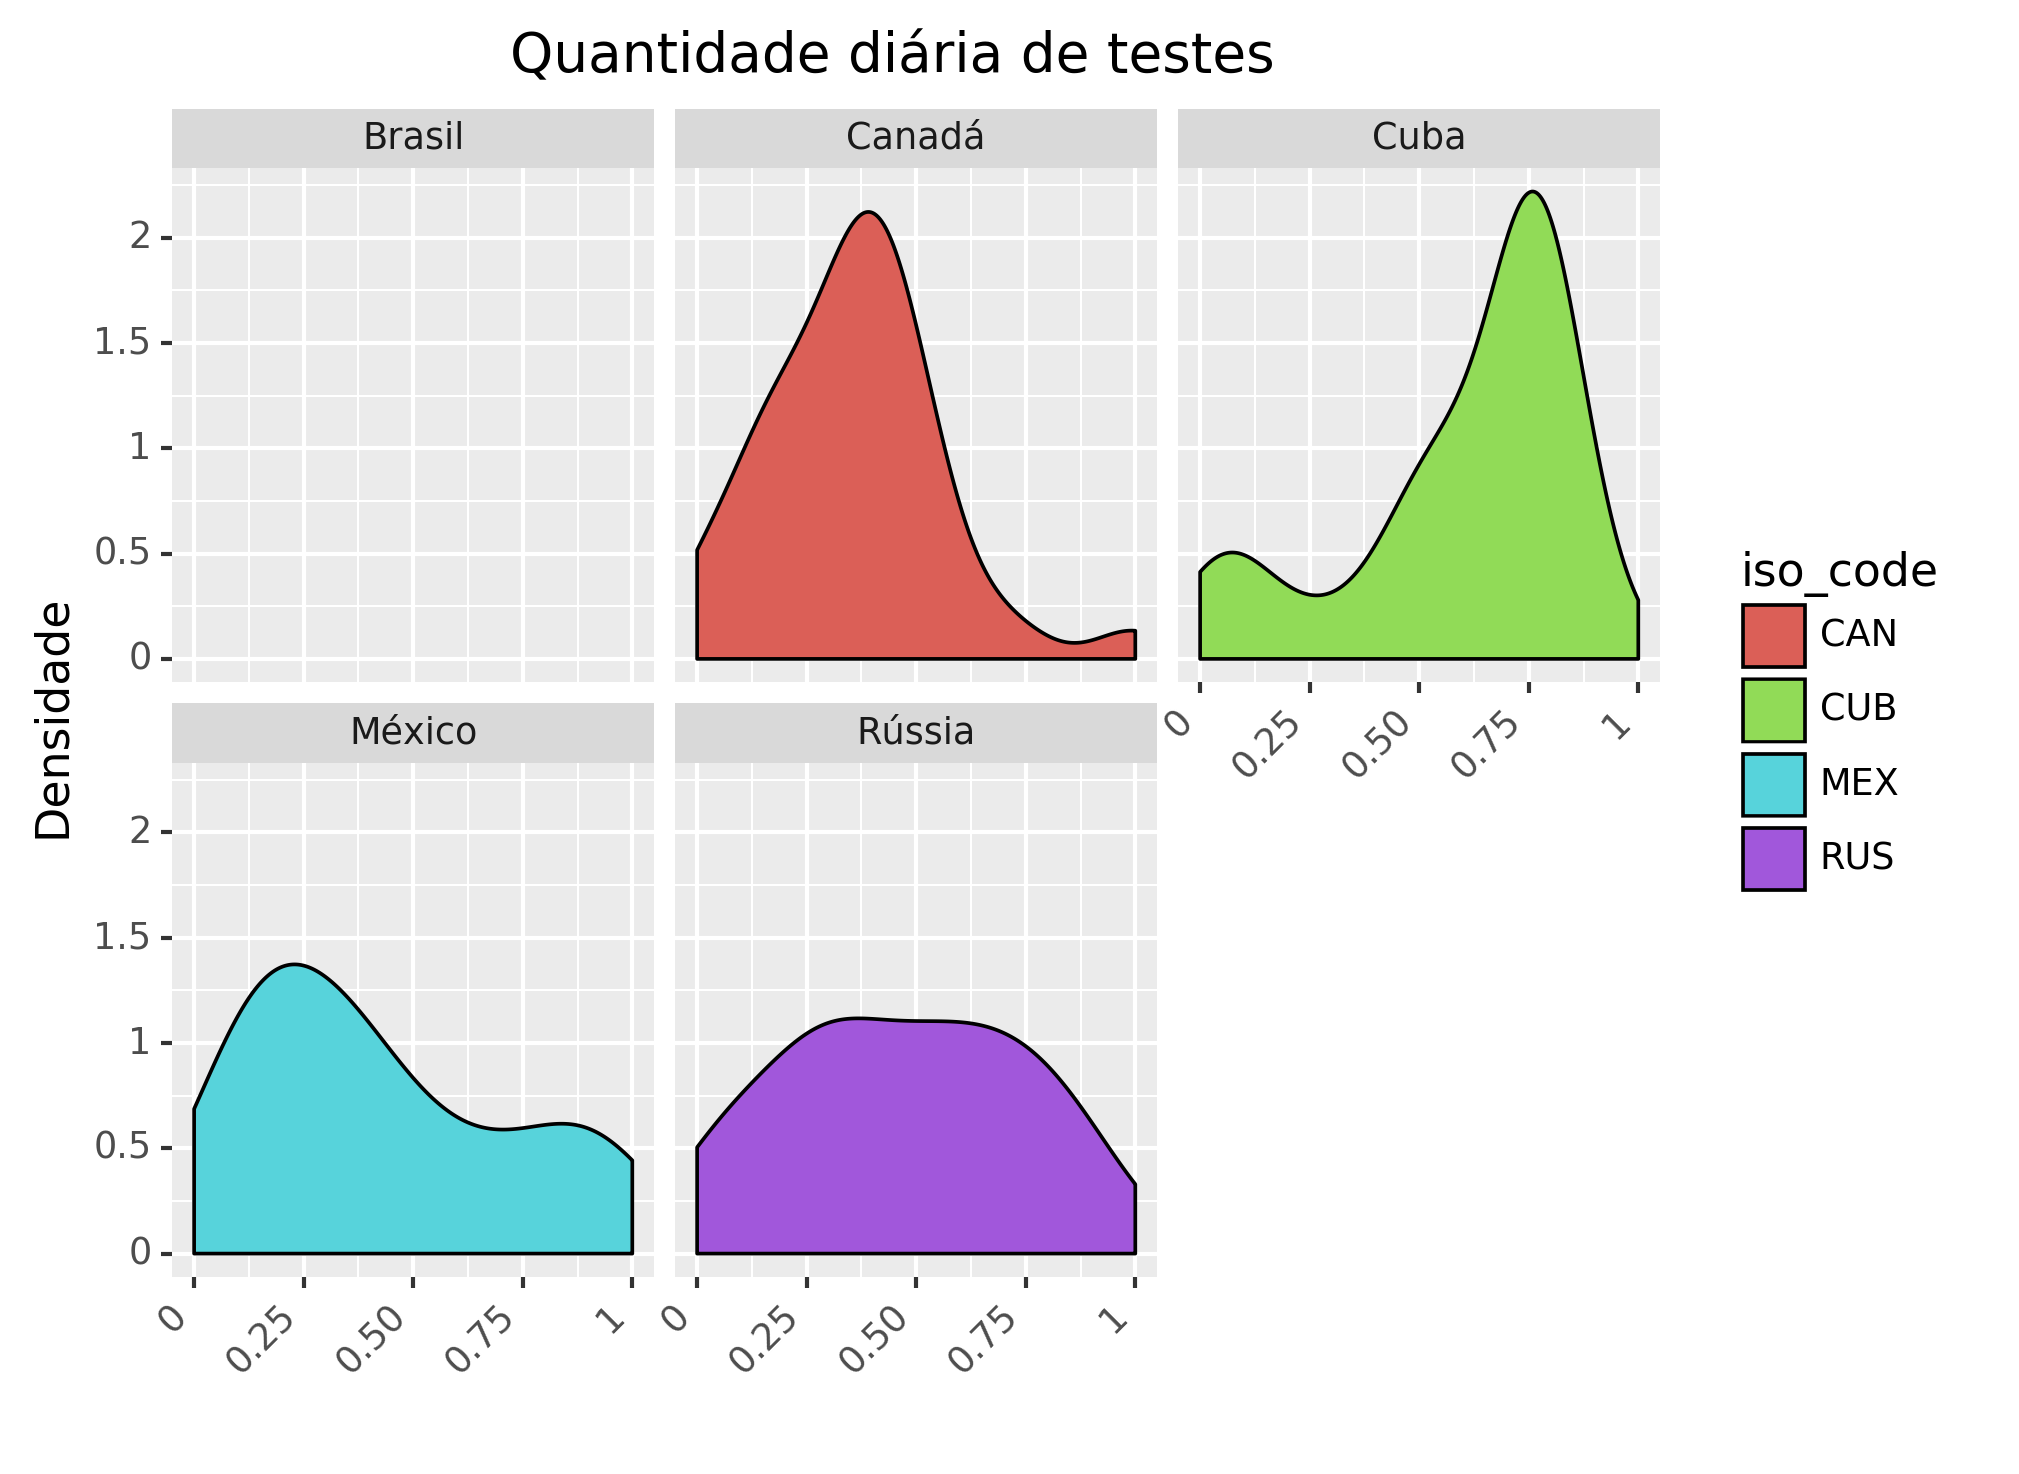

<ggplot: (8784875688673)>

In [49]:
plot_density_bycountry(data_owd, 'new_tests', 'Quantidade diária de testes' ,'iso_code', ' ', 'Densidade')

### Regressão linear

In [52]:
from sklearn.linear_model import LinearRegression